In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

DATA_PATH = r"C:\Users\light\Desktop\study\code\algothon-fintech-unsw-2025\notebooks\.data\2025\prices.txt"

data = pd.read_csv(DATA_PATH, sep="\s+", header=None)

data.shape, data.head()

((750, 50),
       0      1      2      3      4      5      6      7      8      9   ...  \
 0  38.25  69.06  62.08  31.80  63.01  28.30  36.93  43.23  42.31  67.37  ...   
 1  38.11  69.98  62.39  31.74  62.49  28.23  37.13  42.85  41.85  68.41  ...   
 2  37.90  69.56  62.82  31.57  62.74  28.60  36.57  42.99  41.48  69.84  ...   
 3  37.64  69.39  63.26  31.56  61.85  28.67  37.09  43.23  41.24  70.36  ...   
 4  37.70  69.71  64.04  31.42  62.02  28.42  37.09  42.90  41.40  69.12  ...   
 
       40     41     42     43     44     45     46     47     48     49  
 0  74.39  41.30  30.05  39.53  76.07  28.62  72.03  24.02  76.03  27.50  
 1  74.69  41.70  30.18  38.93  75.71  28.47  72.11  24.04  76.05  27.54  
 2  75.14  41.14  30.09  38.17  75.56  28.48  72.54  23.76  75.66  27.55  
 3  75.24  41.38  30.08  38.24  75.35  28.59  73.75  23.97  75.71  27.74  
 4  75.33  41.69  30.34  37.85  75.21  28.55  74.32  24.01  75.77  27.54  
 
 [5 rows x 50 columns])

In [2]:
data.isnull().sum().sum()

0

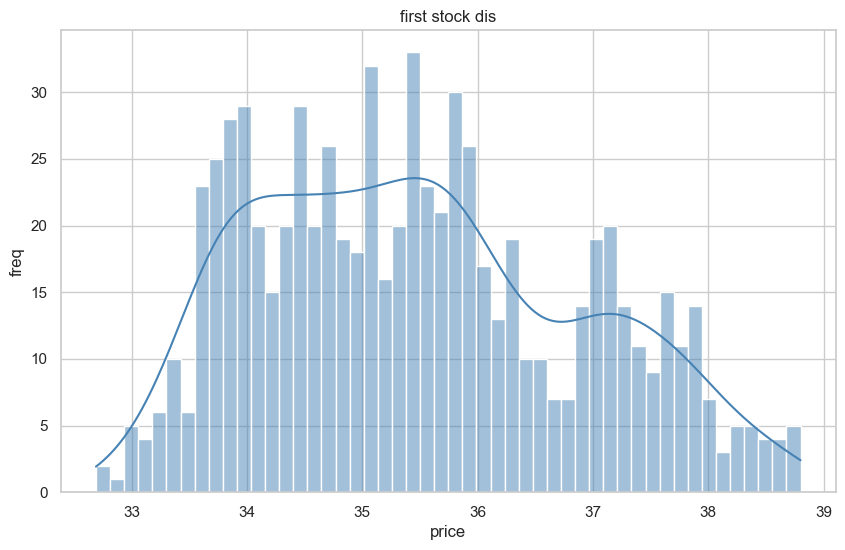

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(data[0], bins=50, kde=True, color='steelblue')
plt.title("first stock dis")
plt.xlabel("price")
plt.ylabel("freq")
plt.show()

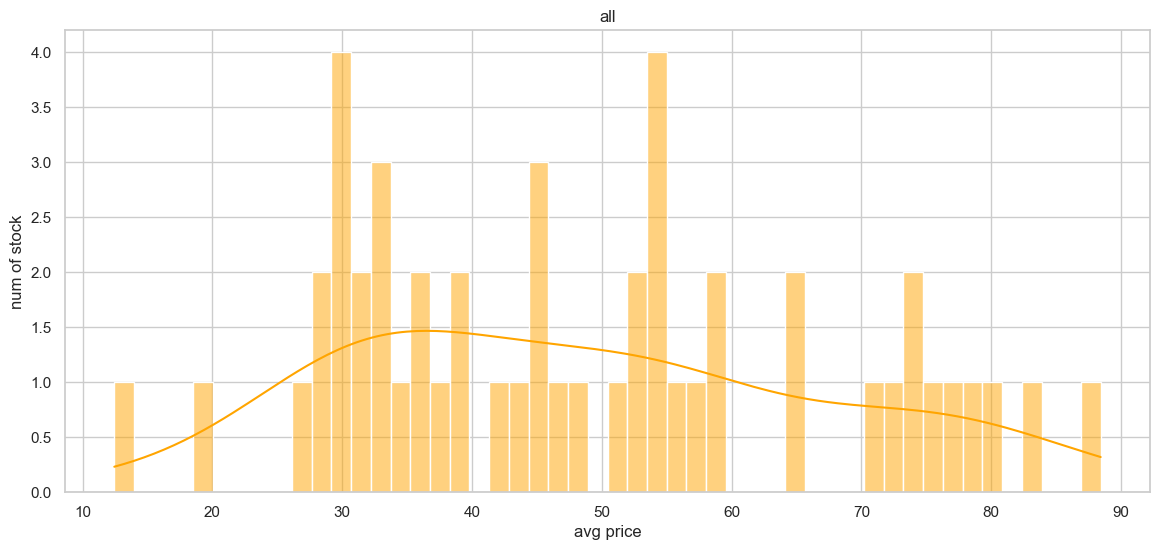

In [4]:
means = data.mean()
plt.figure(figsize=(14,6))
sns.histplot(means, bins=50, kde=True, color='orange')
plt.title("all")
plt.xlabel("avg price")
plt.ylabel("num of stock")
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, kendalltau
import warnings
warnings.filterwarnings('ignore')

class StockCorrelationAnalyzer:
    def __init__(self, data):
        """
        Initialize the analyzer
        data: DataFrame, stock price data
        """
        self.data = data
        self.n_stocks = data.shape[1]
        self.results = {}
    
    def pearson_correlation(self, threshold=0.7):
        """
        Calculate Pearson correlation coefficient
        threshold: correlation threshold, values above this are considered strong correlations
        """
        print("Calculating Pearson correlation coefficients...")
        corr_matrix = self.data.corr(method='pearson')
        
        # Find strongly correlated stock pairs
        strong_correlations = []
        for i in range(self.n_stocks):
            for j in range(i+1, self.n_stocks):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) >= threshold:
                    strong_correlations.append({
                        'stock_1': i,
                        'stock_2': j,
                        'correlation': corr_value,
                        'strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                    })
        
        self.results['pearson'] = {
            'matrix': corr_matrix,
            'strong_pairs': strong_correlations
        }
        
        return corr_matrix, strong_correlations
    
    def spearman_correlation(self, threshold=0.7):
        """
        Calculate Spearman rank correlation coefficient (non-parametric correlation)
        """
        print("Calculating Spearman correlation coefficients...")
        corr_matrix = self.data.corr(method='spearman')
        
        strong_correlations = []
        for i in range(self.n_stocks):
            for j in range(i+1, self.n_stocks):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) >= threshold:
                    strong_correlations.append({
                        'stock_1': i,
                        'stock_2': j,
                        'correlation': corr_value,
                        'strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                    })
        
        self.results['spearman'] = {
            'matrix': corr_matrix,
            'strong_pairs': strong_correlations
        }
        
        return corr_matrix, strong_correlations
    
    def kendall_tau_correlation(self, threshold=0.5):
        """
        Calculate Kendall's tau correlation coefficient
        """
        print("Calculating Kendall's tau correlation coefficients...")
        corr_matrix = self.data.corr(method='kendall')
        
        strong_correlations = []
        for i in range(self.n_stocks):
            for j in range(i+1, self.n_stocks):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) >= threshold:
                    strong_correlations.append({
                        'stock_1': i,
                        'stock_2': j,
                        'correlation': corr_value,
                        'strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                    })
        
        self.results['kendall'] = {
            'matrix': corr_matrix,
            'strong_pairs': strong_correlations
        }
        
        return corr_matrix, strong_correlations
    
    def rolling_correlation(self, window=30, stock_pairs=None, threshold=0.7):
        """
        Calculate rolling correlation (time-varying correlation)
        window: rolling window size
        stock_pairs: specified stock pairs, if None, calculate all strongly correlated pairs
        """
        print(f"Calculating {window}-day rolling correlation...")
        
        if stock_pairs is None:
            # Use strongly correlated pairs from Pearson correlation
            if 'pearson' not in self.results:
                self.pearson_correlation(threshold)
            stock_pairs = [(pair['stock_1'], pair['stock_2']) 
                          for pair in self.results['pearson']['strong_pairs']]
        
        rolling_corr_results = {}
        for stock1, stock2 in stock_pairs:
            rolling_corr = self.data.iloc[:, stock1].rolling(window=window).corr(
                self.data.iloc[:, stock2]
            )
            rolling_corr_results[f'stock_{stock1}_vs_{stock2}'] = rolling_corr
        
        self.results['rolling_correlation'] = rolling_corr_results
        return rolling_corr_results
    
    def cointegration_test(self, significance_level=0.05):
        """
        Cointegration test (requires statsmodels installation)
        """
        try:
            from statsmodels.tsa.stattools import coint
            print("Performing cointegration test...")
            
            cointegrated_pairs = []
            for i in range(self.n_stocks):
                for j in range(i+1, self.n_stocks):
                    try:
                        # Perform cointegration test
                        score, p_value, critical_values = coint(
                            self.data.iloc[:, i], 
                            self.data.iloc[:, j]
                        )
                        
                        if p_value < significance_level:
                            cointegrated_pairs.append({
                                'stock_1': i,
                                'stock_2': j,
                                'adf_statistic': score,
                                'p_value': p_value,
                                'critical_1%': critical_values[0],
                                'critical_5%': critical_values[1],
                                'critical_10%': critical_values[2]
                            })
                    except:
                        continue
            
            self.results['cointegration'] = cointegrated_pairs
            return cointegrated_pairs
            
        except ImportError:
            print("statsmodels library is required for cointegration testing")
            return None
    
    def partial_correlation(self, control_variables=None):
        """
        Partial correlation analysis
        control_variables: list of stock indices to use as control variables
        """
        print("Calculating partial correlation coefficients...")
        try:
            from pingouin import partial_corr
            
            if control_variables is None:
                # Default to using market average as control variable
                market_avg = self.data.mean(axis=1)
                data_with_market = self.data.copy()
                data_with_market['market'] = market_avg
                
                partial_corr_results = []
                for i in range(self.n_stocks):
                    for j in range(i+1, self.n_stocks):
                        try:
                            df_temp = pd.DataFrame({
                                'x': self.data.iloc[:, i],
                                'y': self.data.iloc[:, j],
                                'covar': market_avg
                            })
                            
                            pc = partial_corr(data=df_temp, x='x', y='y', covar='covar')
                            partial_corr_results.append({
                                'stock_1': i,
                                'stock_2': j,
                                'partial_correlation': pc['r'].iloc[0],
                                'p_value': pc['p-val'].iloc[0]
                            })
                        except:
                            continue
                
                self.results['partial_correlation'] = partial_corr_results
                return partial_corr_results
                
        except ImportError:
            print("pingouin library is required for partial correlation analysis")
            return None
    
    def distance_correlation(self, threshold=0.3):
        """
        Distance correlation (captures non-linear relationships)
        """
        try:
            from dcor import distance_correlation
            print("Calculating distance correlation...")
            
            dist_corr_results = []
            for i in range(self.n_stocks):
                for j in range(i+1, self.n_stocks):
                    try:
                        dist_corr = distance_correlation(
                            self.data.iloc[:, i].values,
                            self.data.iloc[:, j].values
                        )
                        
                        if dist_corr >= threshold:
                            dist_corr_results.append({
                                'stock_1': i,
                                'stock_2': j,
                                'distance_correlation': dist_corr
                            })
                    except:
                        continue
            
            self.results['distance_correlation'] = dist_corr_results
            return dist_corr_results
            
        except ImportError:
            print("dcor library is required for distance correlation analysis")
            return None
    
    def comprehensive_analysis(self, pearson_threshold=0.7, spearman_threshold=0.7, 
                             kendall_threshold=0.5):
        """
        Comprehensive analysis - run all correlation analyses
        """
        print("Starting comprehensive correlation analysis...")
        print("="*50)
        
        # 1. Pearson correlation
        pearson_matrix, pearson_pairs = self.pearson_correlation(pearson_threshold)
        
        # 2. Spearman correlation
        spearman_matrix, spearman_pairs = self.spearman_correlation(spearman_threshold)
        
        # 3. Kendall's tau correlation
        kendall_matrix, kendall_pairs = self.kendall_tau_correlation(kendall_threshold)
        
        # 4. Rolling correlation
        if pearson_pairs:
            rolling_corr = self.rolling_correlation(
                stock_pairs=[(p['stock_1'], p['stock_2']) for p in pearson_pairs[:5]]  # Only calculate top 5 pairs
            )
        
        # 5. Cointegration test
        cointegrated = self.cointegration_test()
        
        # 6. Partial correlation
        partial_corr = self.partial_correlation()
        
        # 7. Distance correlation
        dist_corr = self.distance_correlation()
        
        return self.results
    
    def print_summary(self):
        """
        Print analysis results summary
        """
        print("\n" + "="*60)
        print("Stock Correlation Analysis Results Summary")
        print("="*60)
        
        for method, result in self.results.items():
            if method in ['pearson', 'spearman', 'kendall']:
                pairs = result['strong_pairs']
                print(f"\n{method.upper()} Correlation:")
                print(f"  Number of strong correlation pairs: {len(pairs)}")
                if pairs:
                    print("  Top 5 strongest correlation pairs:")
                    sorted_pairs = sorted(pairs, key=lambda x: abs(x['correlation']), reverse=True)
                    for i, pair in enumerate(sorted_pairs[:5]):
                        print(f"    {i+1}. Stock{pair['stock_1']} vs Stock{pair['stock_2']}: "
                              f"{pair['correlation']:.3f} ({pair['strength']})")
            
            elif method == 'cointegration' and result:
                print(f"\nCointegration Test:")
                print(f"  Number of cointegrated pairs: {len(result)}")
                if result:
                    print("  Top 3 cointegrated pairs:")
                    for i, pair in enumerate(result[:3]):
                        print(f"    {i+1}. Stock{pair['stock_1']} vs Stock{pair['stock_2']}: "
                              f"p-value={pair['p_value']:.4f}")
    
    def plot_correlation_heatmap(self, method='pearson', figsize=(12, 10)):
        """
        Plot correlation heatmap
        """
        if method not in self.results:
            print(f"Please run {method} correlation analysis first")
            return
        
        plt.figure(figsize=figsize)
        corr_matrix = self.results[method]['matrix']
        
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Only show lower triangle
        
        sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
                   center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
        
        plt.title(f'{method.capitalize()} Correlation Heatmap')
        plt.xlabel('Stock Index')
        plt.ylabel('Stock Index')
        plt.tight_layout()
        plt.show()


Data shape: (750, 50)
Data head:
      0      1      2      3      4      5      6      7      8      9   ...  \
0  38.25  69.06  62.08  31.80  63.01  28.30  36.93  43.23  42.31  67.37  ...   
1  38.11  69.98  62.39  31.74  62.49  28.23  37.13  42.85  41.85  68.41  ...   
2  37.90  69.56  62.82  31.57  62.74  28.60  36.57  42.99  41.48  69.84  ...   
3  37.64  69.39  63.26  31.56  61.85  28.67  37.09  43.23  41.24  70.36  ...   
4  37.70  69.71  64.04  31.42  62.02  28.42  37.09  42.90  41.40  69.12  ...   

      40     41     42     43     44     45     46     47     48     49  
0  74.39  41.30  30.05  39.53  76.07  28.62  72.03  24.02  76.03  27.50  
1  74.69  41.70  30.18  38.93  75.71  28.47  72.11  24.04  76.05  27.54  
2  75.14  41.14  30.09  38.17  75.56  28.48  72.54  23.76  75.66  27.55  
3  75.24  41.38  30.08  38.24  75.35  28.59  73.75  23.97  75.71  27.74  
4  75.33  41.69  30.34  37.85  75.21  28.55  74.32  24.01  75.77  27.54  

[5 rows x 50 columns]
Starting comprehens

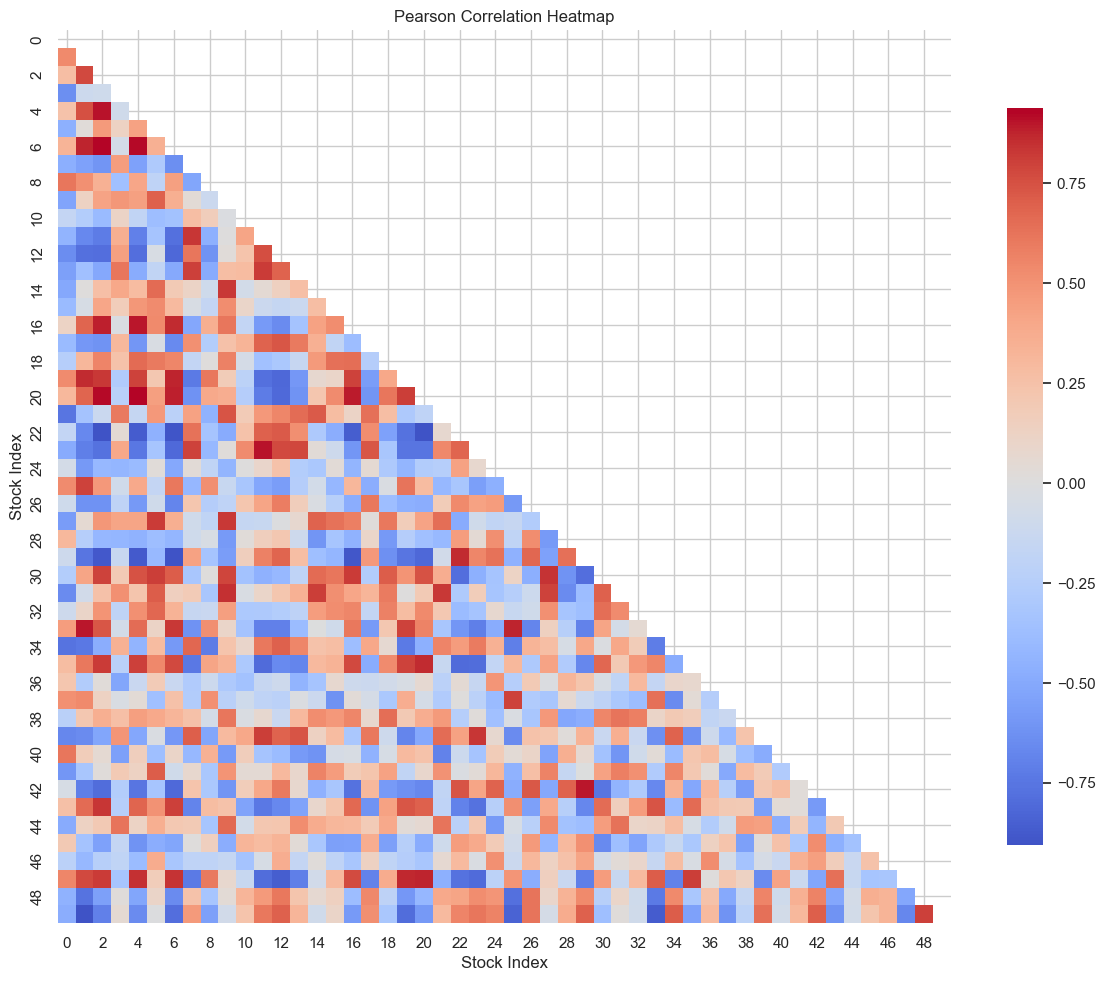

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

DATA_PATH = r"C:\Users\light\Desktop\study\code\algothon-fintech-unsw-2025\notebooks\.data\2025\prices.txt"
data = pd.read_csv(DATA_PATH, sep="\s+", header=None)
print(f"Data shape: {data.shape}")
print("Data head:")
print(data.head())

# Initialize analyzer
analyzer = StockCorrelationAnalyzer(data)

# Run comprehensive analysis
results = analyzer.comprehensive_analysis()

# Print summary
analyzer.print_summary()

# Plot heatmap
analyzer.plot_correlation_heatmap()

In [7]:
def calculate_pearson_correlation_map(data):
    """
    Calculate Pearson correlation for all stock pairs and store in a map
    data: DataFrame, stock price data
    Returns: dict, correlation map with keys like "1vs2", "1vs3", etc.
    """
    n_stocks = data.shape[1]
    correlation_map = {}
    
    for i in range(n_stocks):
        for j in range(i+1, n_stocks):
            # Calculate Pearson correlation between stock i and stock j
            corr_value = data.iloc[:, i].corr(data.iloc[:, j], method='pearson')
            # Store in map with key format "1vs2", "1vs3", etc.
            correlation_map[f"{i+1}vs{j+1}"] = corr_value
    
    return correlation_map

In [8]:
correlation_map = calculate_pearson_correlation_map(data)
correlation_map

{'1vs2': 0.5392654271779798,
 '1vs3': 0.27223592885155823,
 '1vs4': -0.6339056945478904,
 '1vs5': 0.24270029743765323,
 '1vs6': -0.46717863511665525,
 '1vs7': 0.3264776614405912,
 '1vs8': -0.4720312193280984,
 '1vs9': 0.6165315792424388,
 '1vs10': -0.5253931601185292,
 '1vs11': -0.16000803266543187,
 '1vs12': -0.4416328388108783,
 '1vs13': -0.6427253671750309,
 '1vs14': -0.5522739889150489,
 '1vs15': -0.5087077184427381,
 '1vs16': -0.39788469102226354,
 '1vs17': 0.12058867010918409,
 '1vs18': -0.4009469753042628,
 '1vs19': -0.246334166785345,
 '1vs20': 0.5306327141107953,
 '1vs21': 0.30866714710477927,
 '1vs22': -0.7608334286565239,
 '1vs23': -0.1690067965934156,
 '1vs24': -0.49051967999200763,
 '1vs25': -0.06752877906103107,
 '1vs26': 0.5330767560110705,
 '1vs27': -0.09676095015730789,
 '1vs28': -0.5741222553407642,
 '1vs29': 0.3108521982897458,
 '1vs30': -0.10560363461875845,
 '1vs31': -0.2614852840076117,
 '1vs32': -0.6516946930705676,
 '1vs33': -0.106824122921739,
 '1vs34': 0.45107

In [9]:
def calculate_pearson_correlation_map(data):
    """
    Calculate Pearson correlation for all stock pairs and store in a map
    data: DataFrame, stock price data
    Returns: dict, correlation map with keys like "1vs2", "1vs3", etc.
    """
    n_stocks = data.shape[1]
    correlation_map = {}
    
    for i in range(n_stocks):
        for j in range(i+1, n_stocks):
            # Calculate Pearson correlation between stock i and stock j
            corr_value = data.iloc[:, i].corr(data.iloc[:, j], method='pearson')
            # Store in map with key format "1vs2", "1vs3", etc.
            correlation_map[f"{i+1}vs{j+1}"] = corr_value
    
    return correlation_map

def get_top_25_correlations(correlation_map):
    """
    Get top 25 highest correlations
    """
    sorted_correlations = sorted(correlation_map.items(), key=lambda x: x[1], reverse=True)
    return sorted_correlations[:25]

def get_bottom_25_correlations(correlation_map):
    """
    Get bottom 25 lowest correlations (most negative)
    """
    sorted_correlations = sorted(correlation_map.items(), key=lambda x: x[1])
    return sorted_correlations[:25]

def plot_stock_pair(data, pair_key, correlation_value):
    """
    Plot two stock trend lines
    pair_key: string like "1vs2"
    correlation_value: correlation coefficient
    """
    # Extract stock indices from pair_key
    stocks = pair_key.split('vs')
    stock1_idx = int(stocks[0]) - 1  # Convert to 0-based index
    stock2_idx = int(stocks[1]) - 1
    
    plt.figure(figsize=(12, 6))
    
    # Plot both stock trend lines
    plt.plot(data.iloc[:, stock1_idx], label=f'Stock {stocks[0]}', linewidth=2)
    plt.plot(data.iloc[:, stock2_idx], label=f'Stock {stocks[1]}', linewidth=2)
    
    plt.title(f'Stock {stocks[0]} vs Stock {stocks[1]} (Correlation: {correlation_value:.3f})')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_top_25_correlations(data, correlation_map):
    """
    Plot top 25 highest correlations
    """
    top_25 = get_top_25_correlations(correlation_map)
    
    print("Plotting top 25 highest correlations:")
    for i, (pair_key, corr_value) in enumerate(top_25):
        print(f"{i+1}. {pair_key}: {corr_value:.3f}")
        plot_stock_pair(data, pair_key, corr_value)

def plot_bottom_25_correlations(data, correlation_map):
    """
    Plot bottom 25 lowest correlations
    """
    bottom_25 = get_bottom_25_correlations(correlation_map)
    
    print("Plotting bottom 25 lowest correlations:")
    for i, (pair_key, corr_value) in enumerate(bottom_25):
        print(f"{i+1}. {pair_key}: {corr_value:.3f}")
        plot_stock_pair(data, pair_key, corr_value)


In [10]:
# calculate corelation
correlation_map = calculate_pearson_correlation_map(data)

# get hightest top 25
top_25 = get_top_25_correlations(correlation_map)
print("Top 25 highest correlations:")
for pair, corr in top_25:
    print(f"{pair}: {corr:.3f}")

Top 25 highest correlations:
3vs7: 0.938
5vs21: 0.926
3vs21: 0.918
5vs7: 0.918
3vs5: 0.906
12vs24: 0.903
2vs34: 0.899
30vs43: 0.897
5vs17: 0.897
17vs21: 0.893
3vs17: 0.885
7vs21: 0.882
26vs34: 0.879
2vs7: 0.879
21vs48: 0.877
7vs20: 0.875
20vs48: 0.872
21vs36: 0.866
2vs20: 0.865
23vs30: 0.864
7vs17: 0.860
5vs48: 0.852
10vs32: 0.851
28vs31: 0.844
7vs48: 0.837


Plotting top 25 highest correlations:
1. 3vs7: 0.938


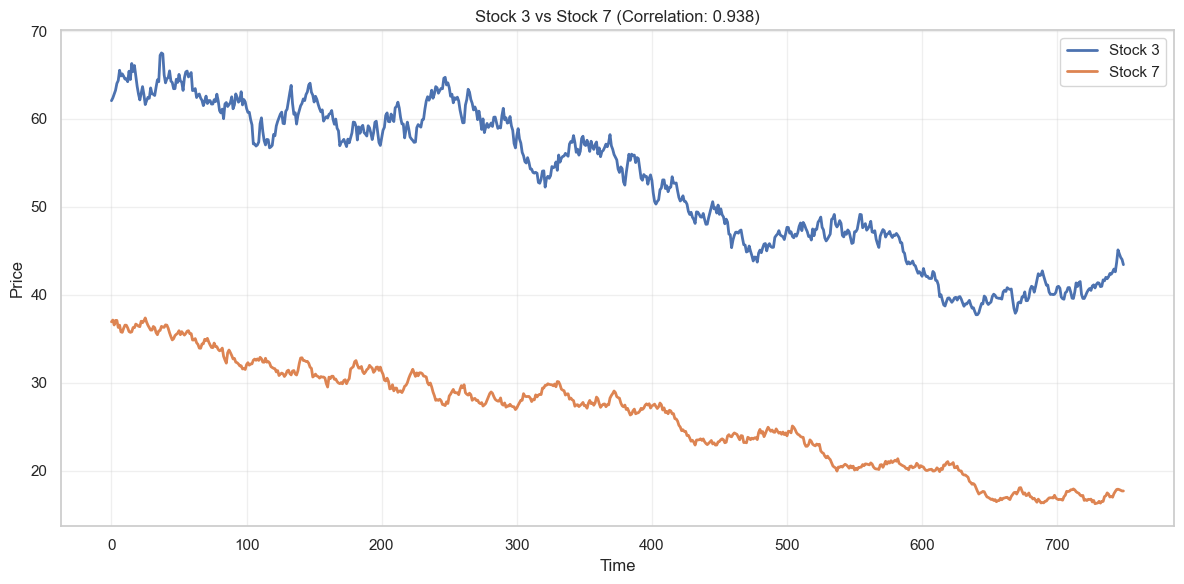

2. 5vs21: 0.926


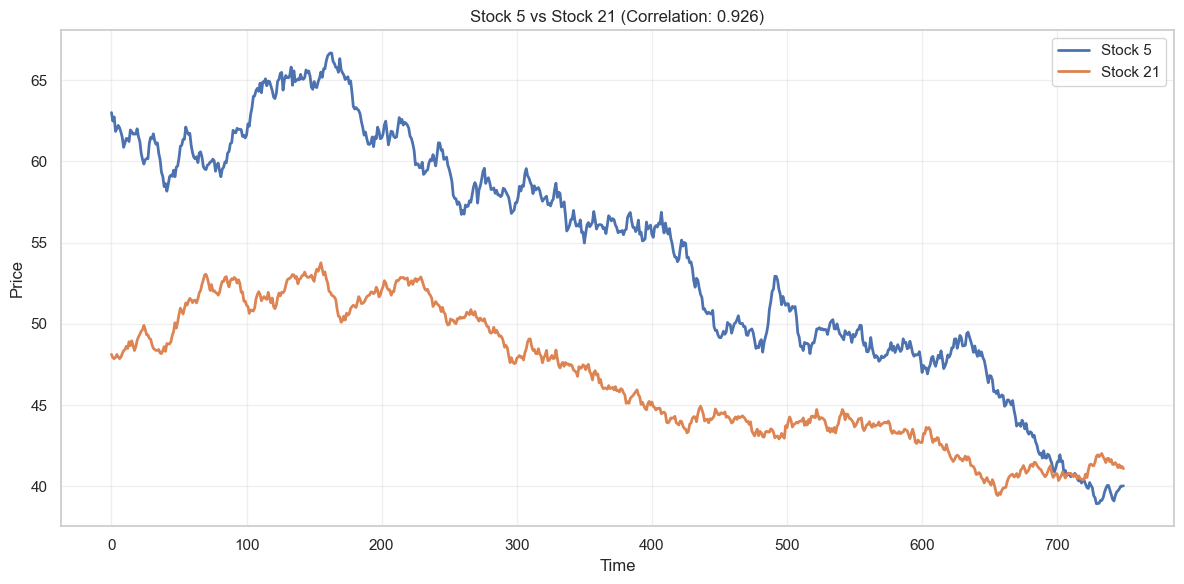

3. 3vs21: 0.918


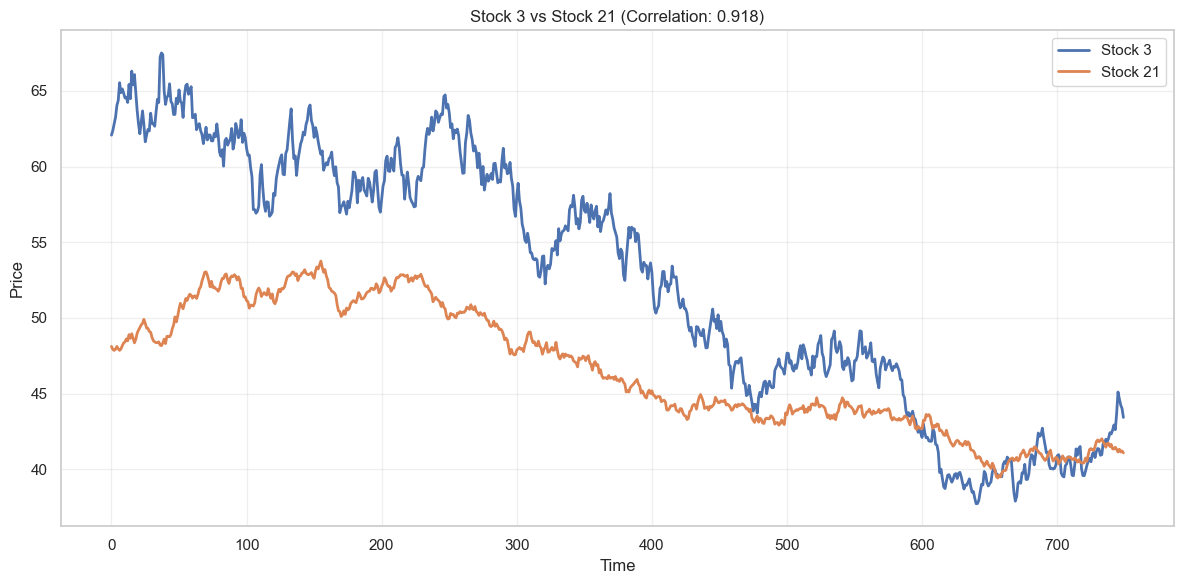

4. 5vs7: 0.918


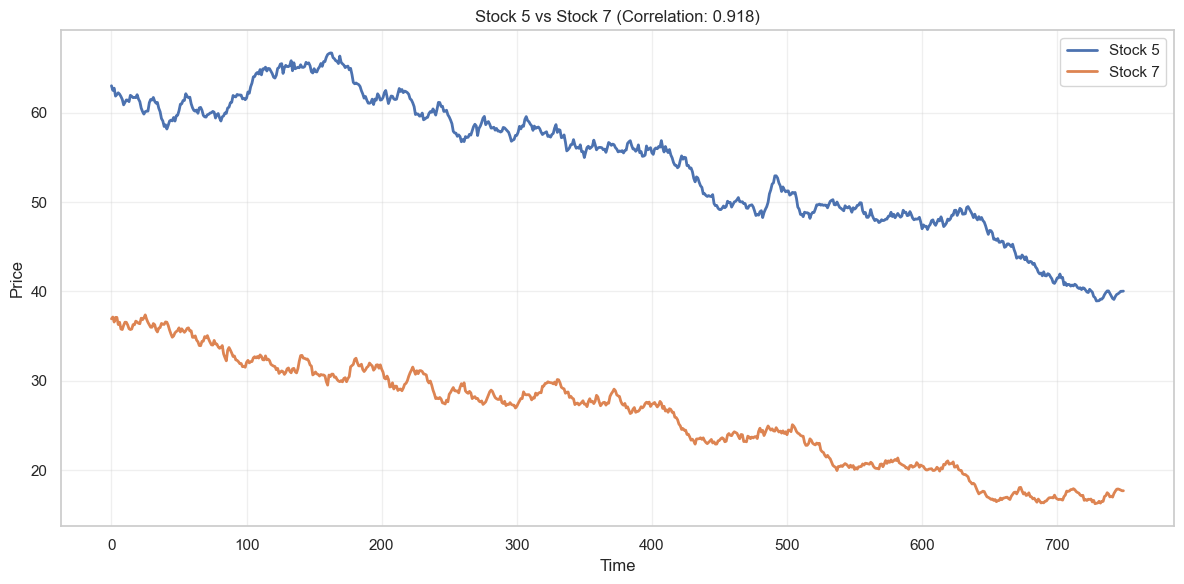

5. 3vs5: 0.906


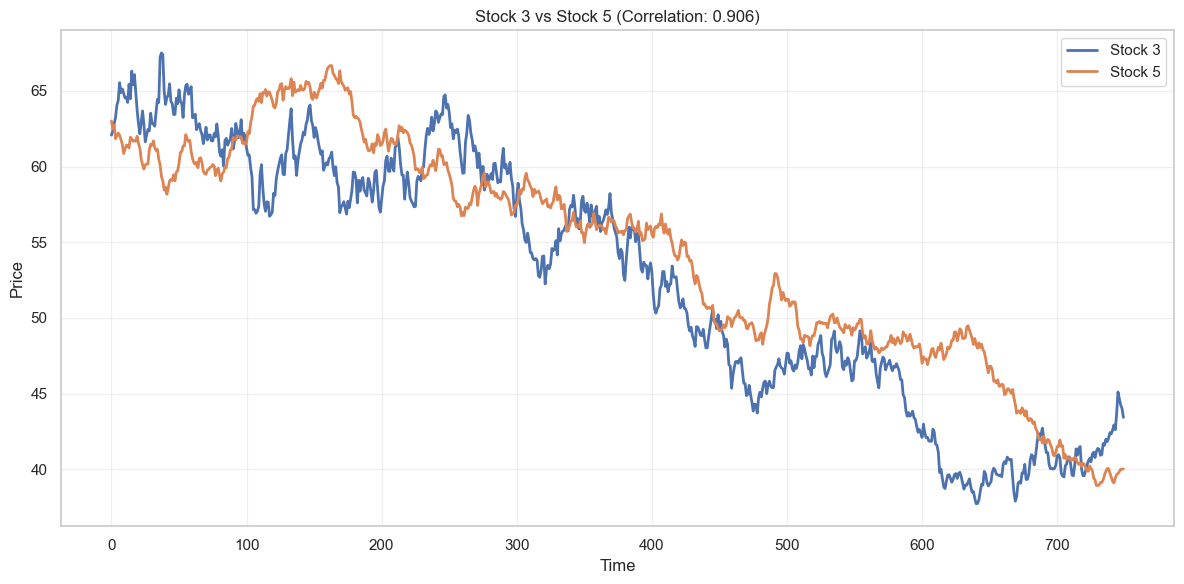

6. 12vs24: 0.903


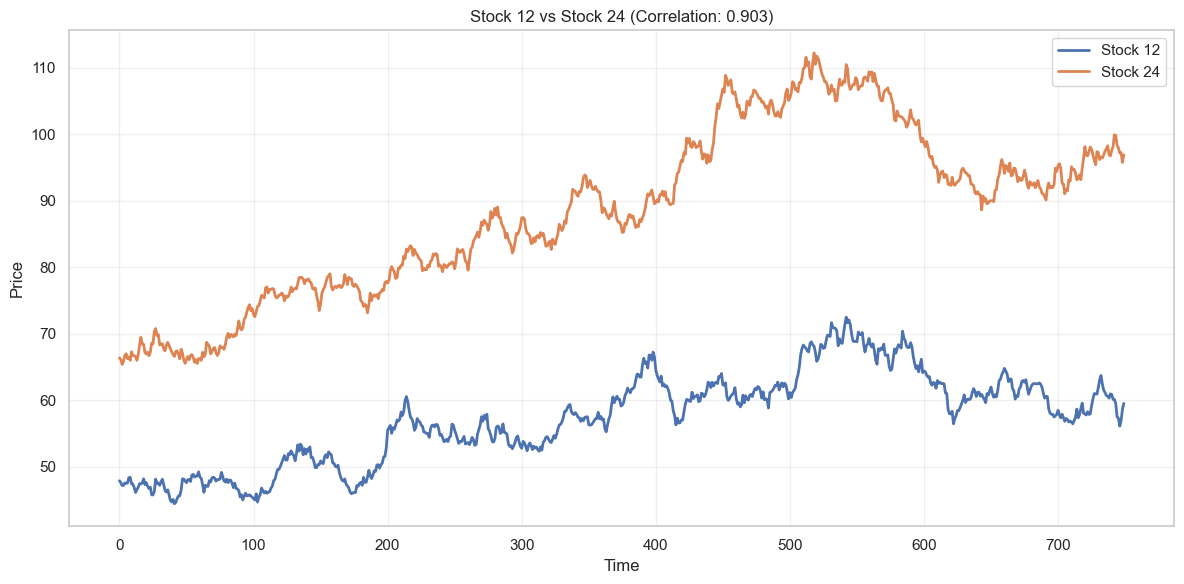

7. 2vs34: 0.899


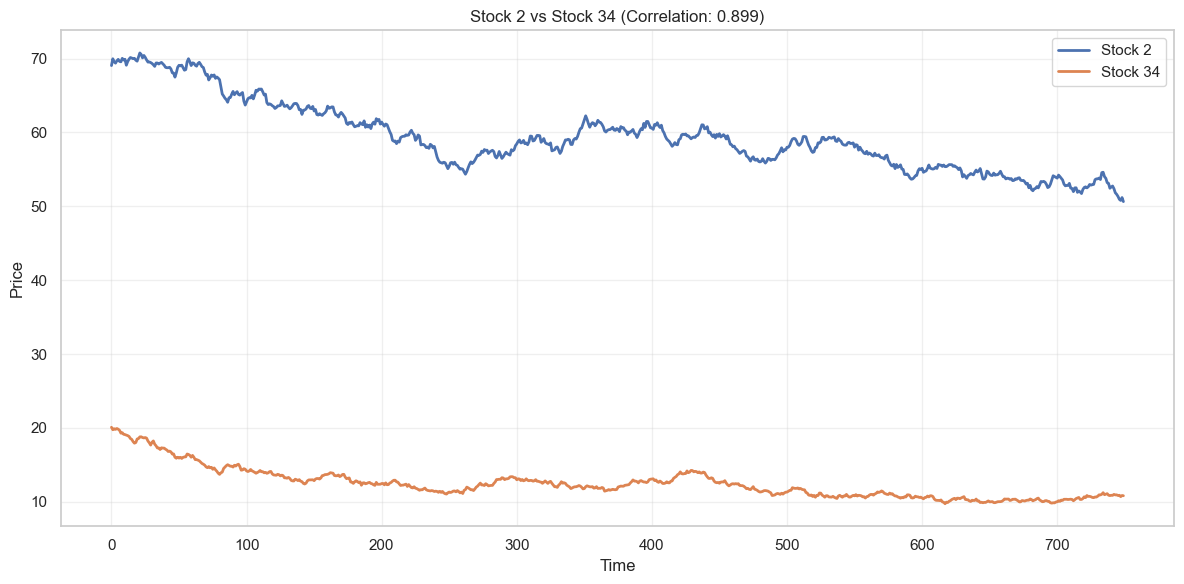

8. 30vs43: 0.897


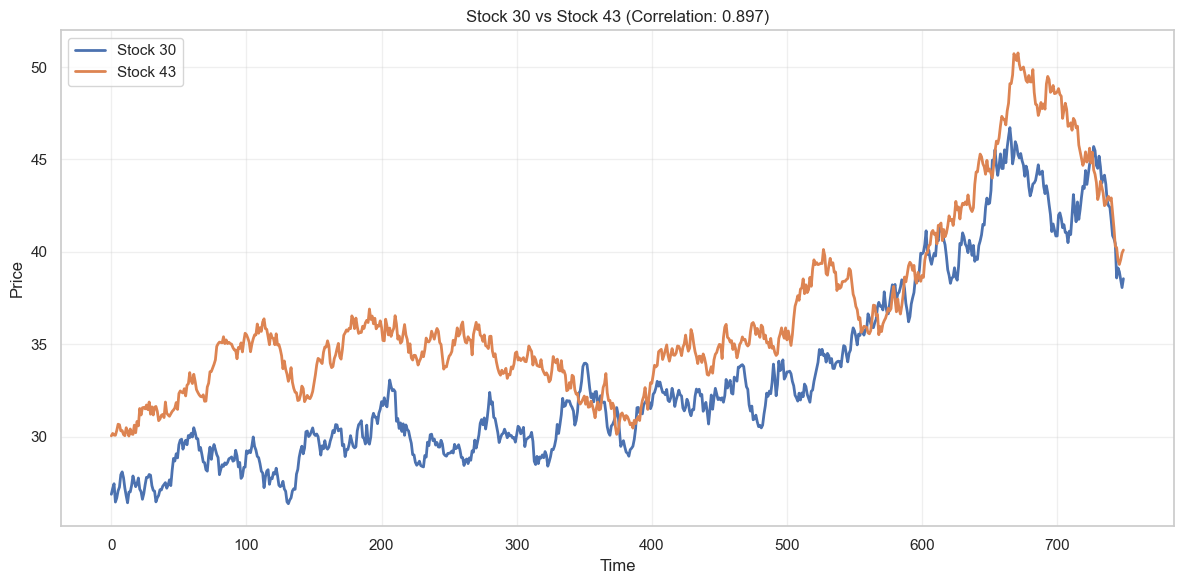

9. 5vs17: 0.897


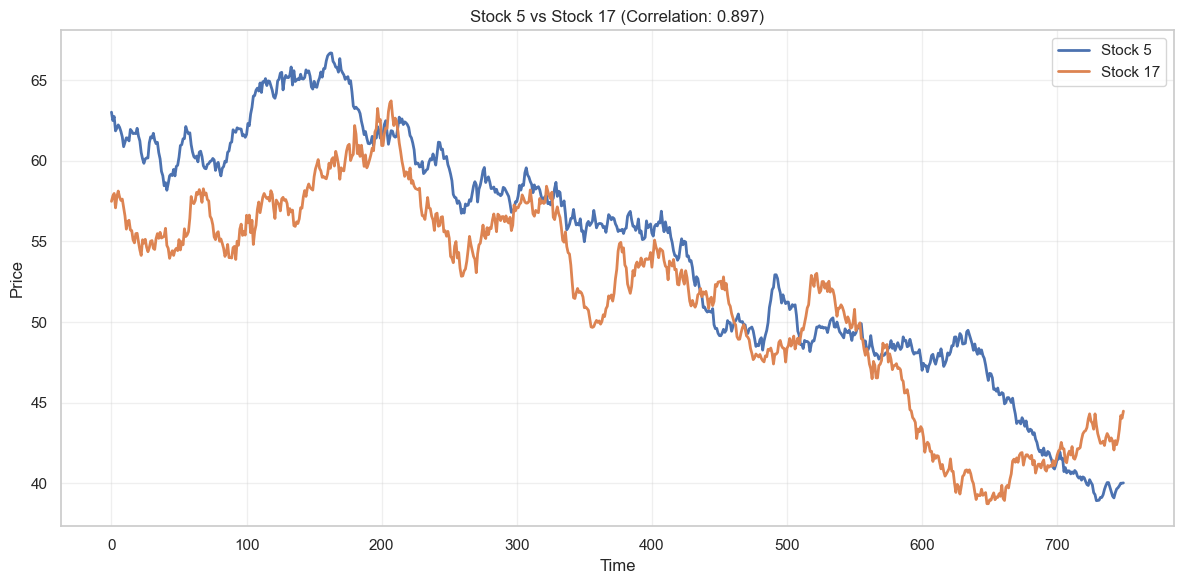

10. 17vs21: 0.893


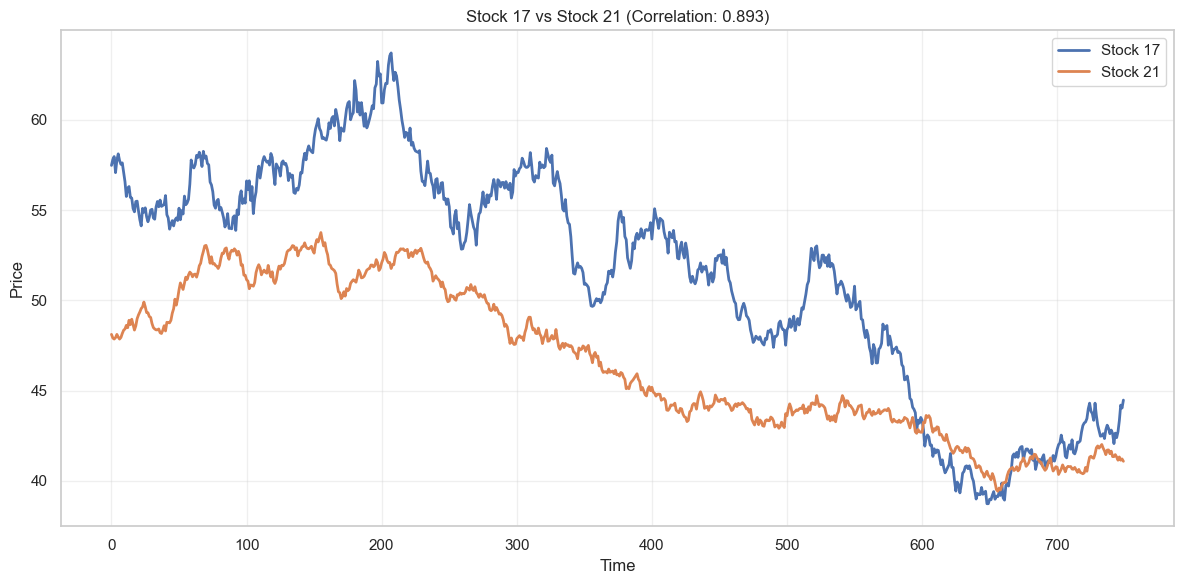

11. 3vs17: 0.885


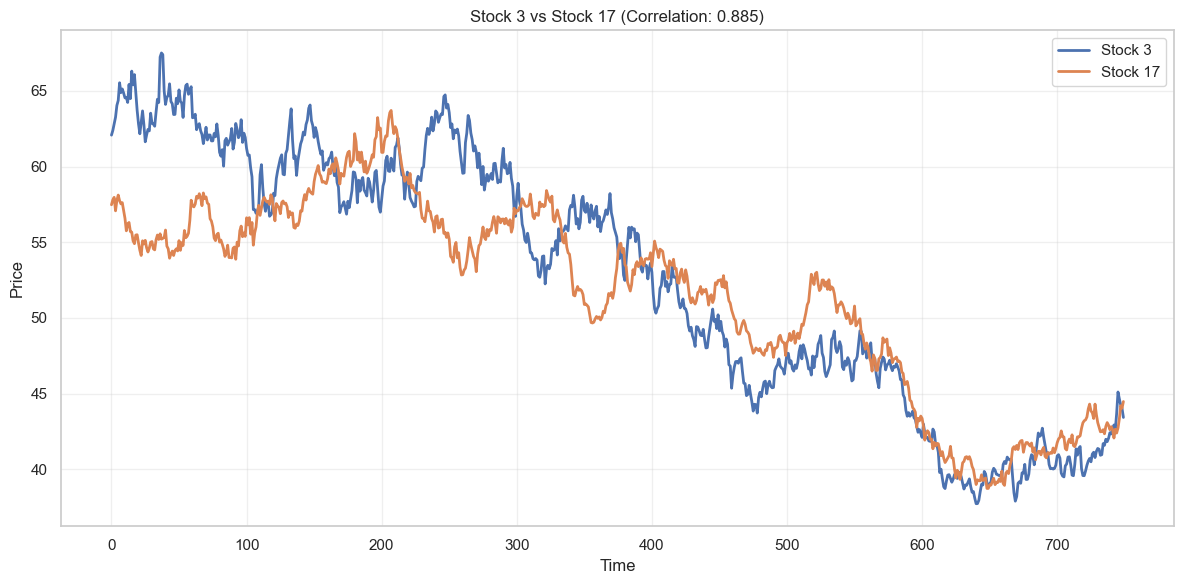

12. 7vs21: 0.882


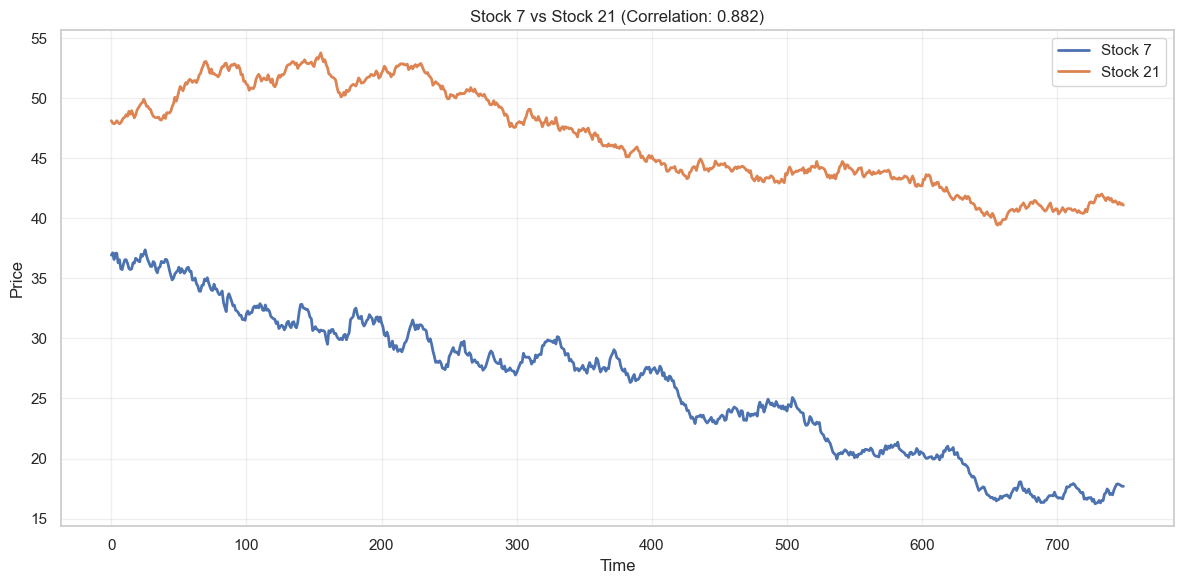

13. 26vs34: 0.879


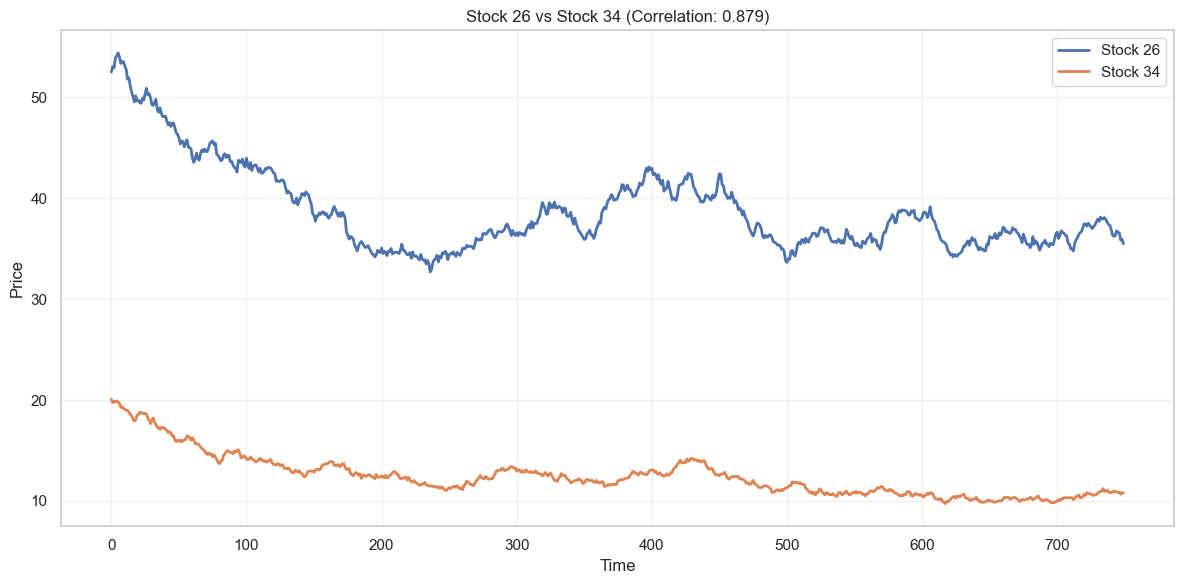

14. 2vs7: 0.879


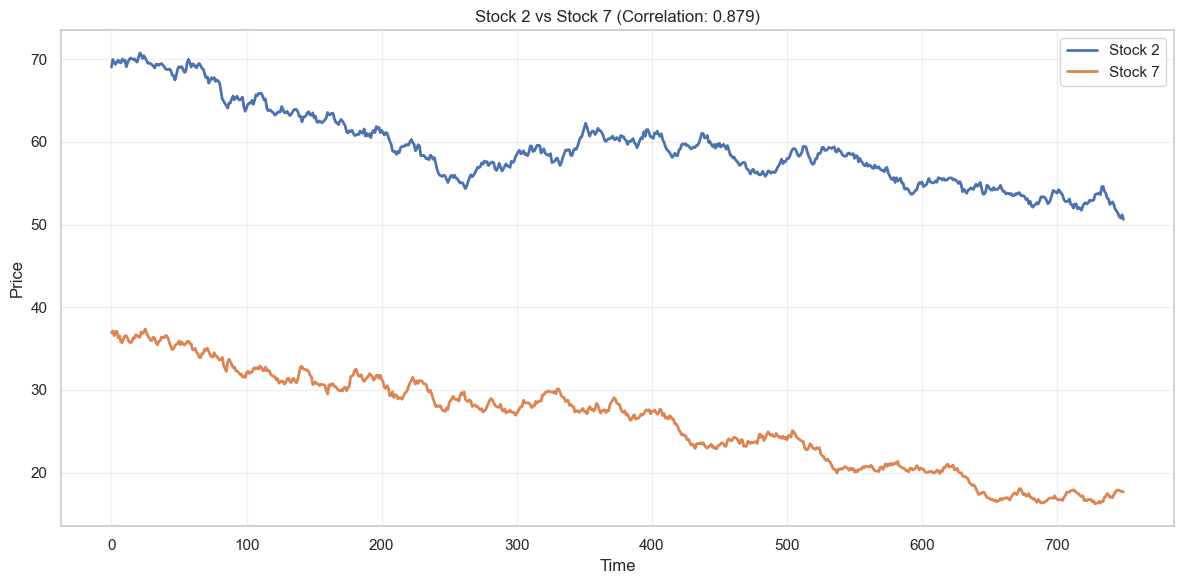

15. 21vs48: 0.877


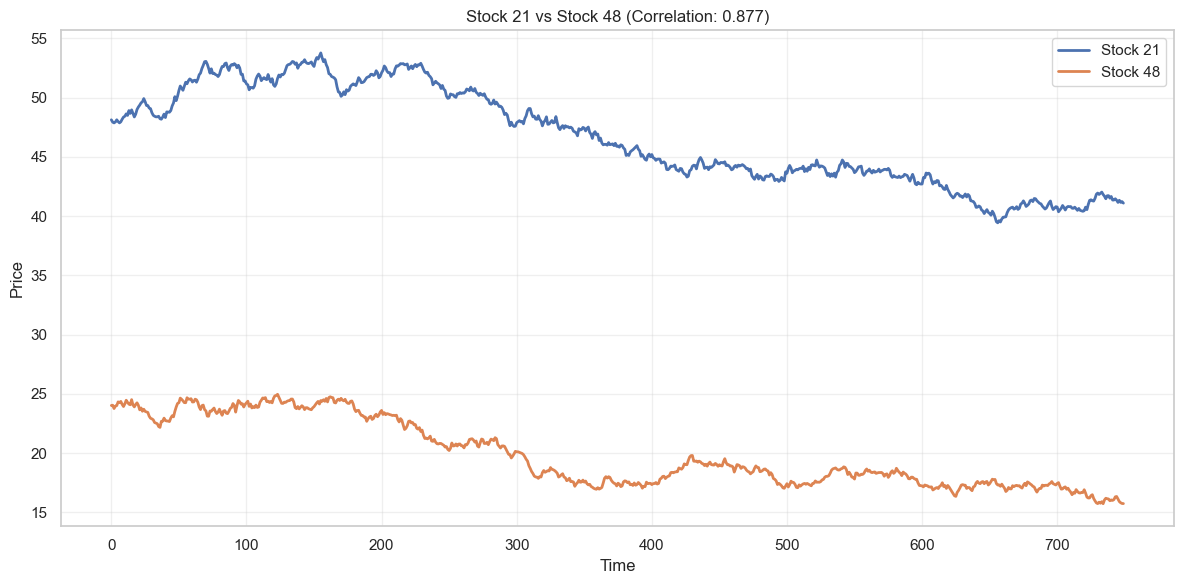

16. 7vs20: 0.875


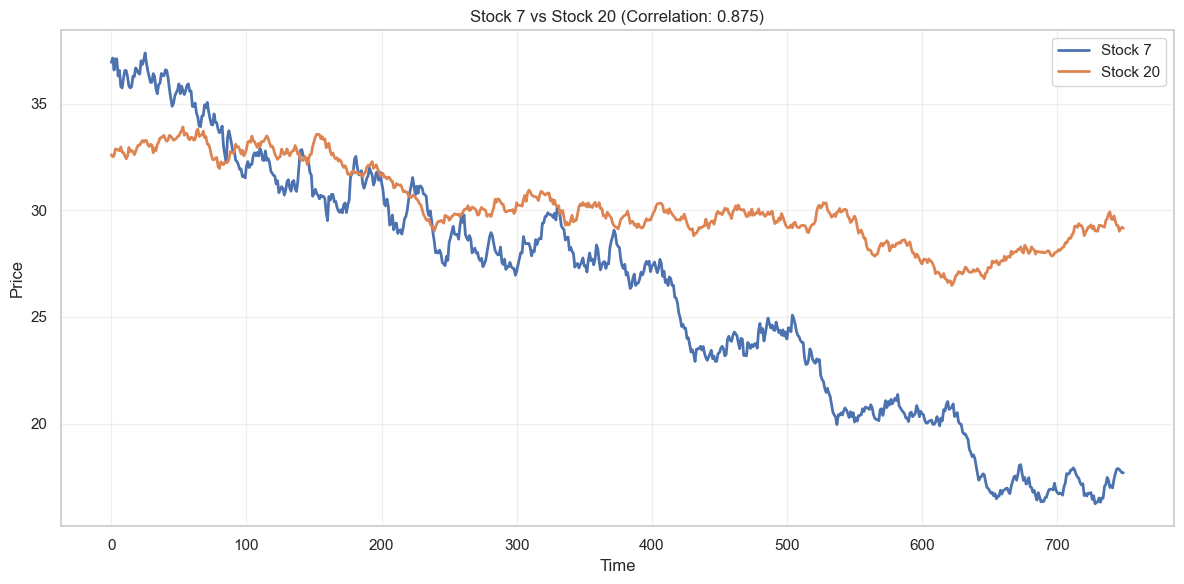

17. 20vs48: 0.872


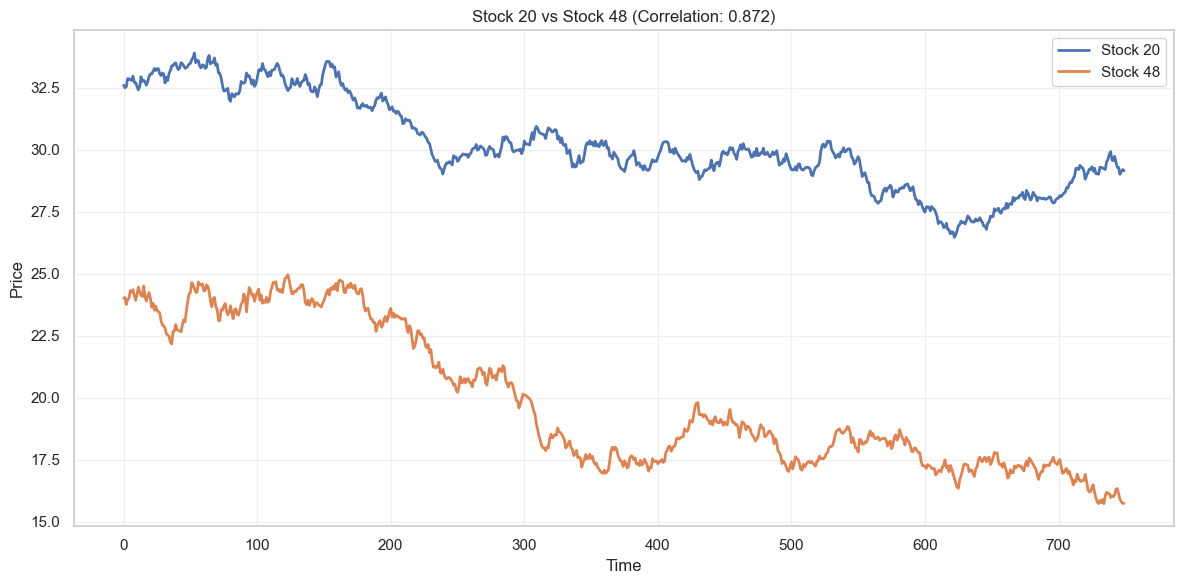

18. 21vs36: 0.866


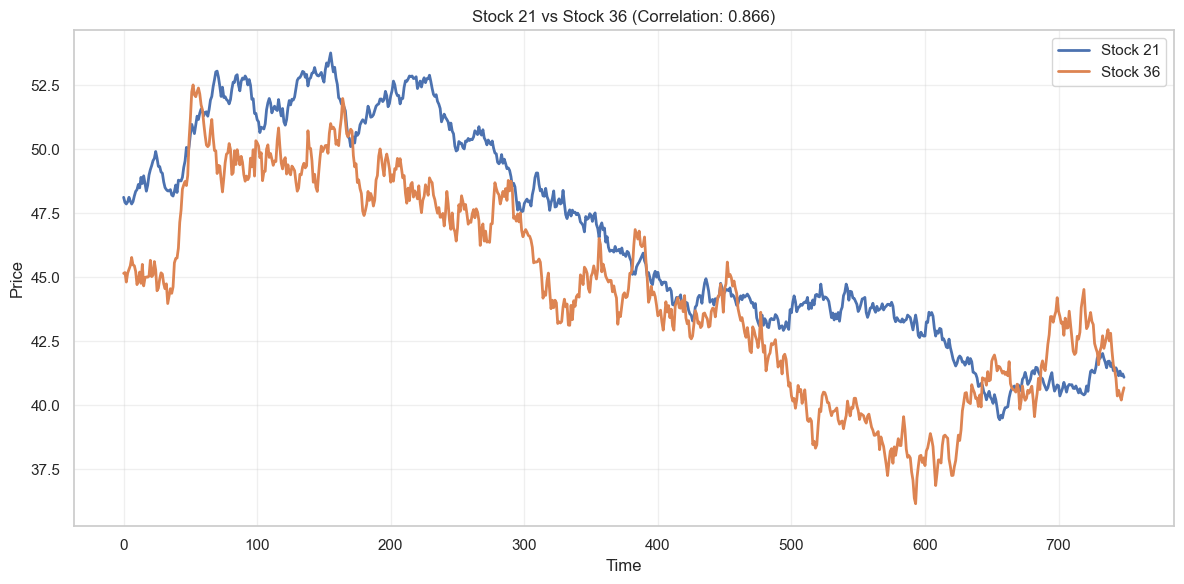

19. 2vs20: 0.865


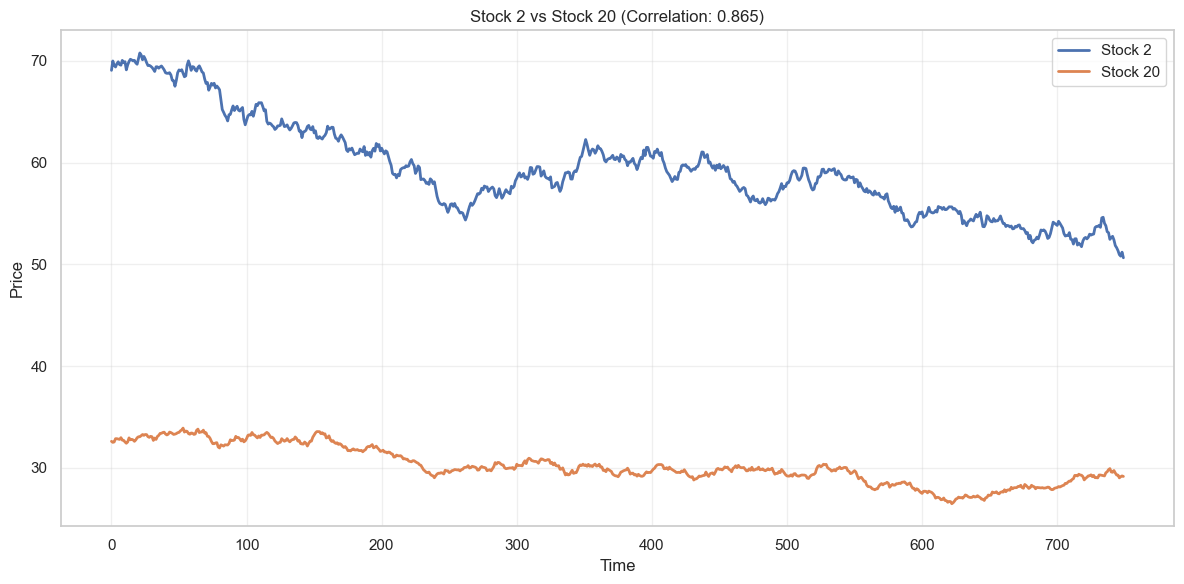

20. 23vs30: 0.864


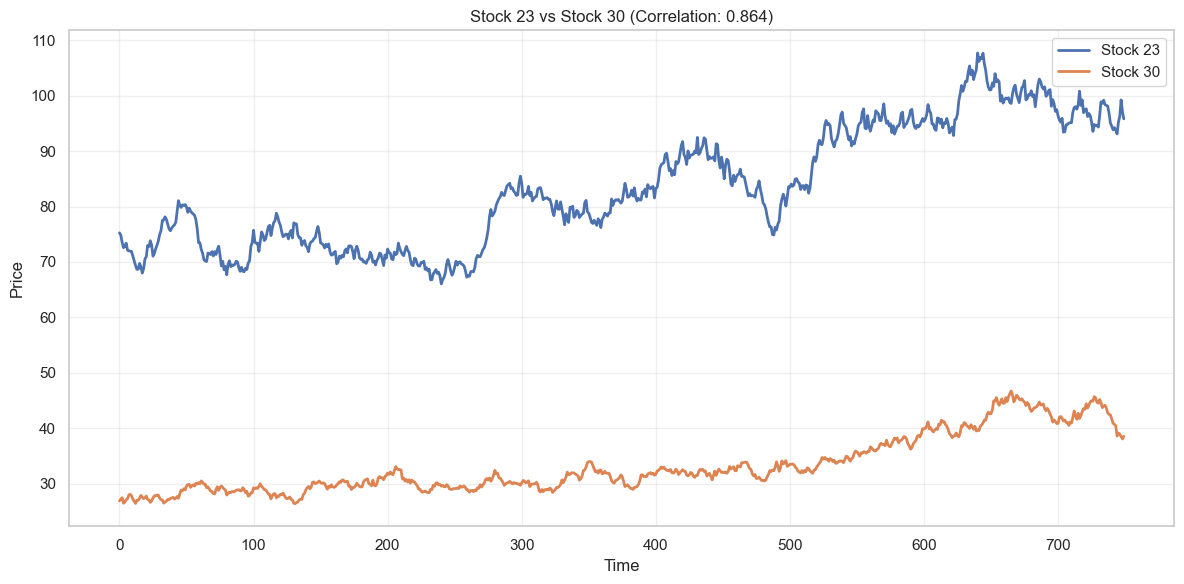

21. 7vs17: 0.860


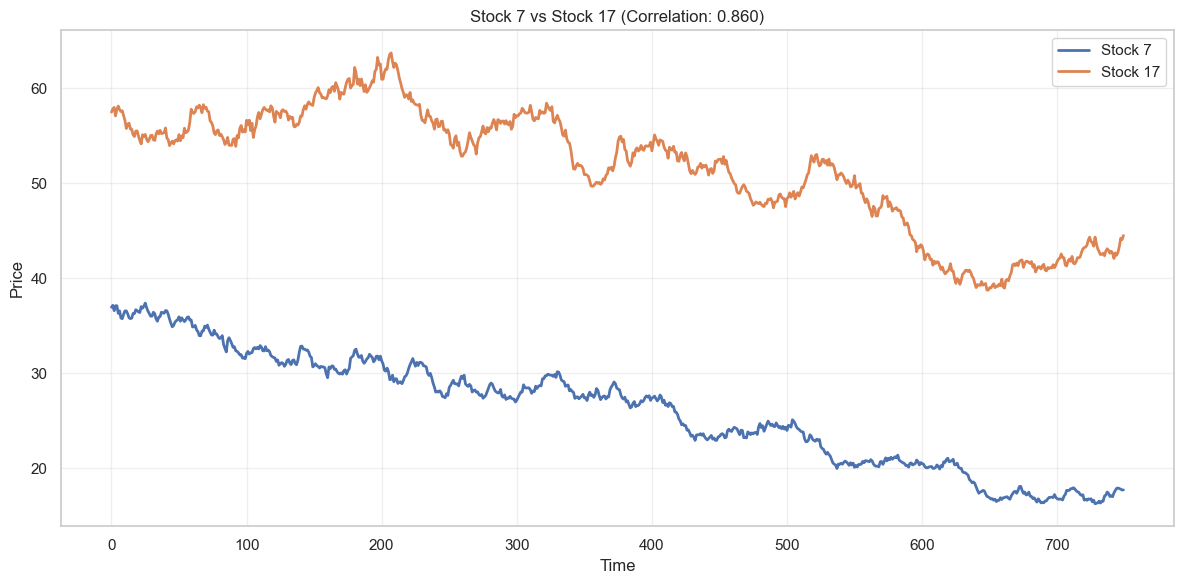

22. 5vs48: 0.852


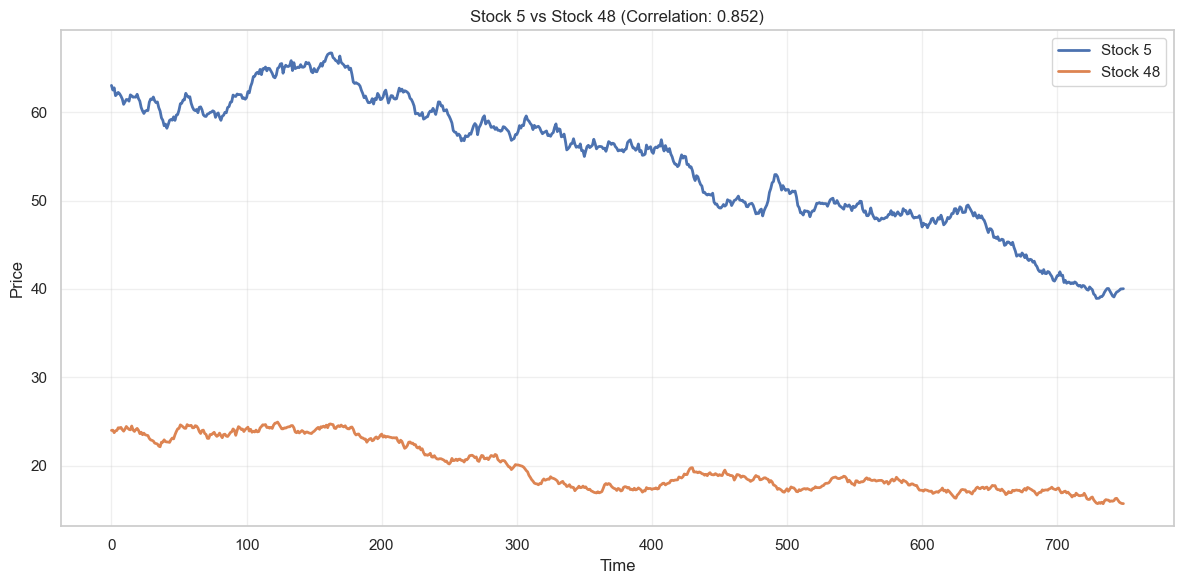

23. 10vs32: 0.851


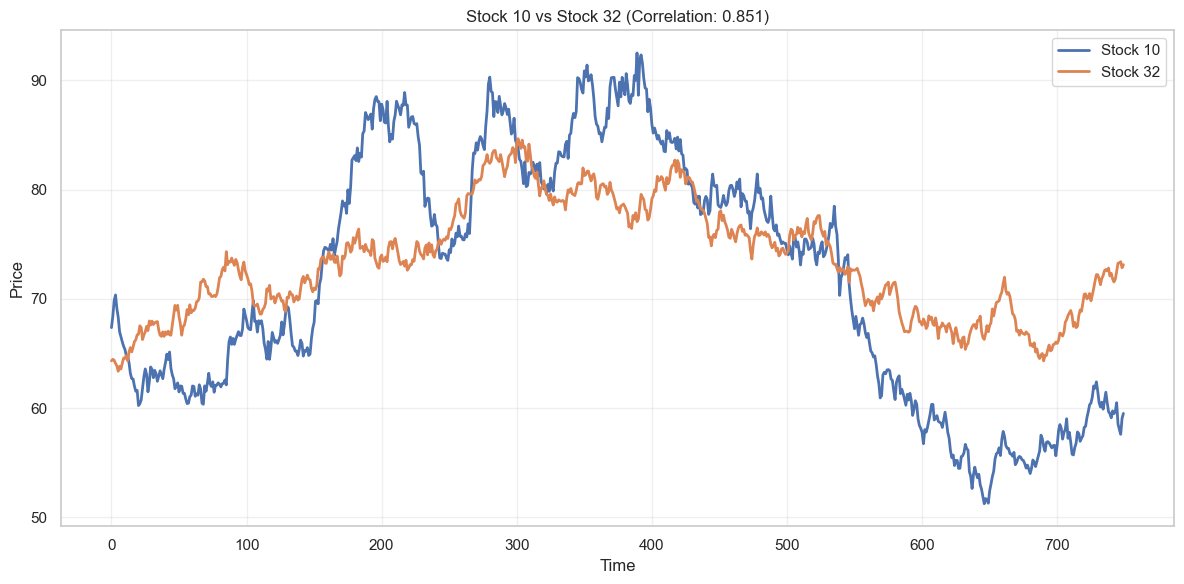

24. 28vs31: 0.844


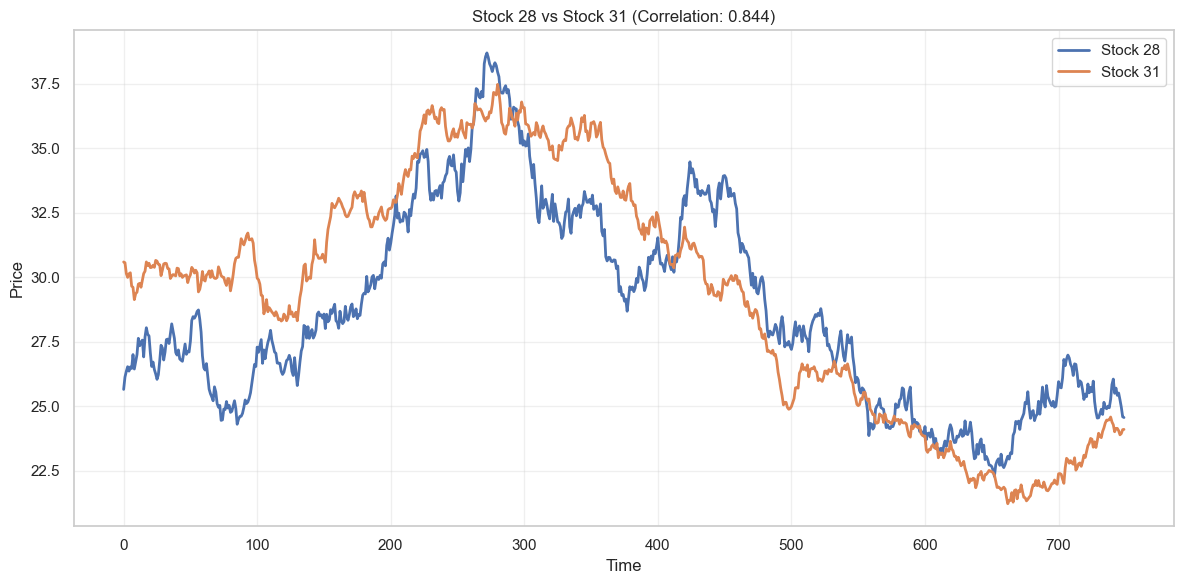

25. 7vs48: 0.837


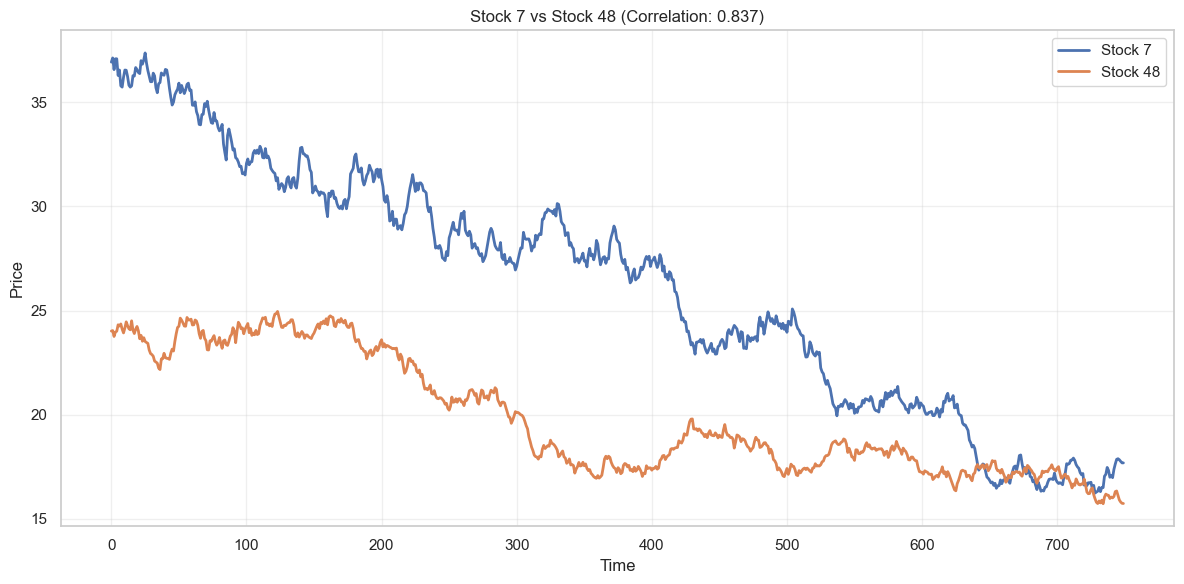

In [11]:
# top 25
plot_top_25_correlations(data, correlation_map)


Plotting bottom 25 lowest correlations:
1. 2vs50: -0.907


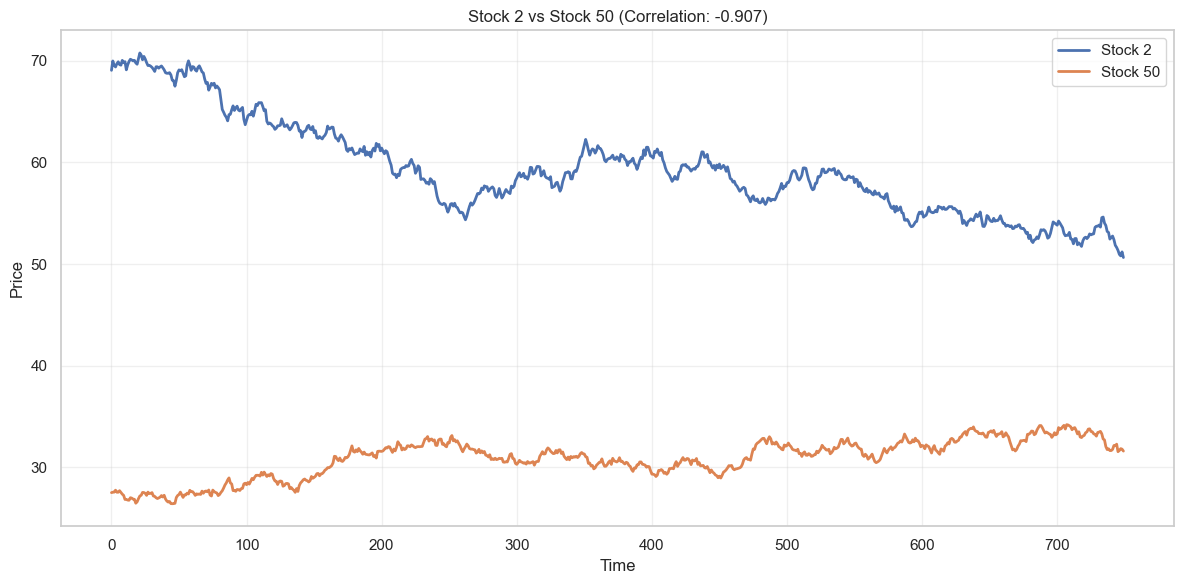

2. 21vs23: -0.905


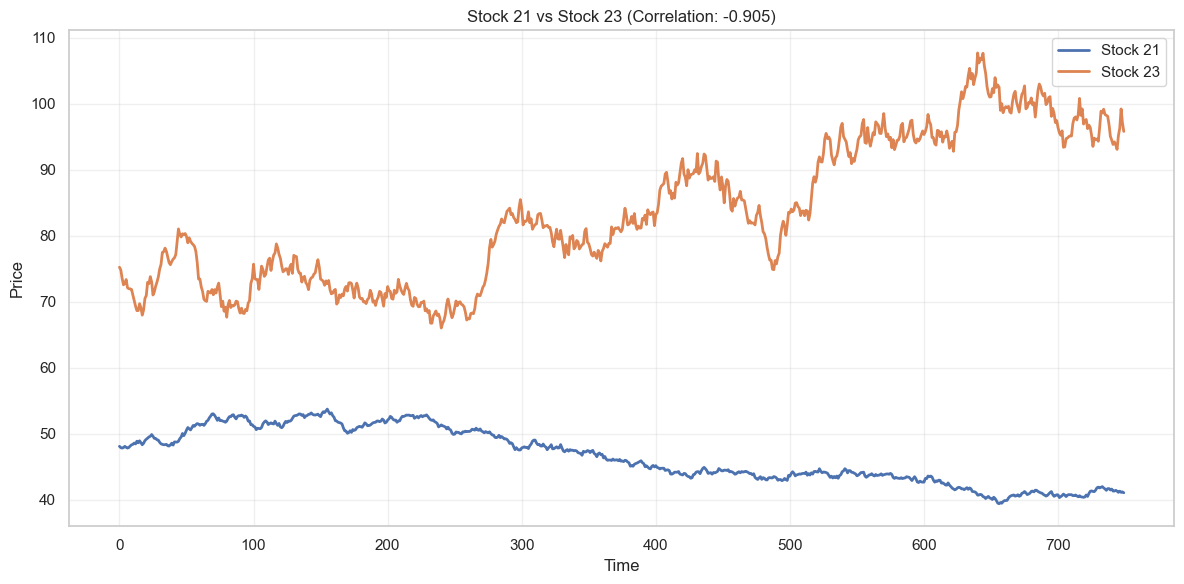

3. 3vs23: -0.901


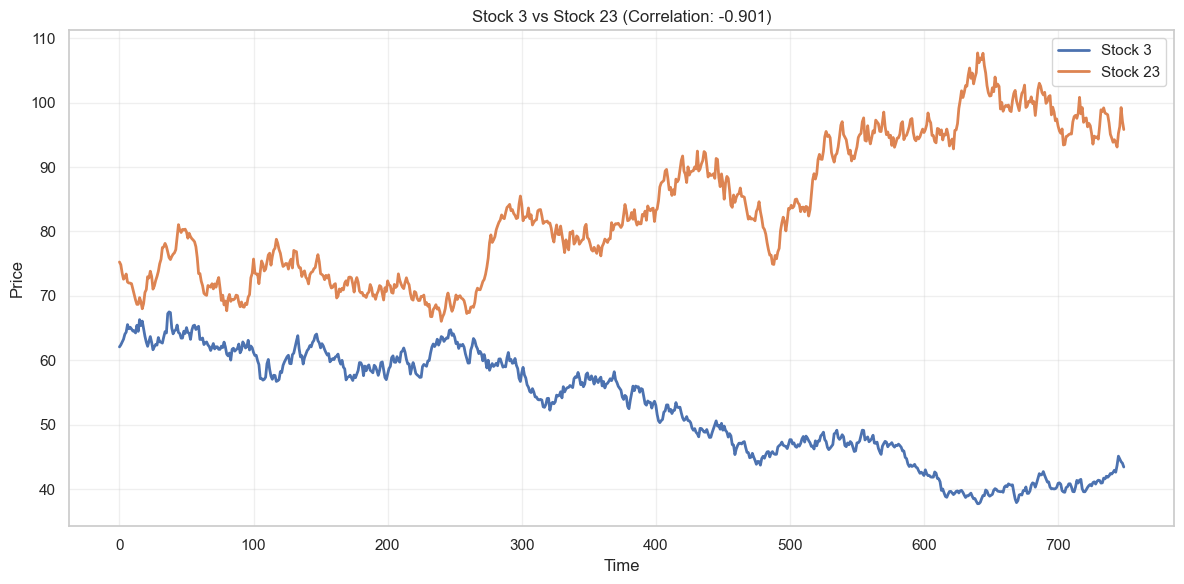

4. 7vs30: -0.900


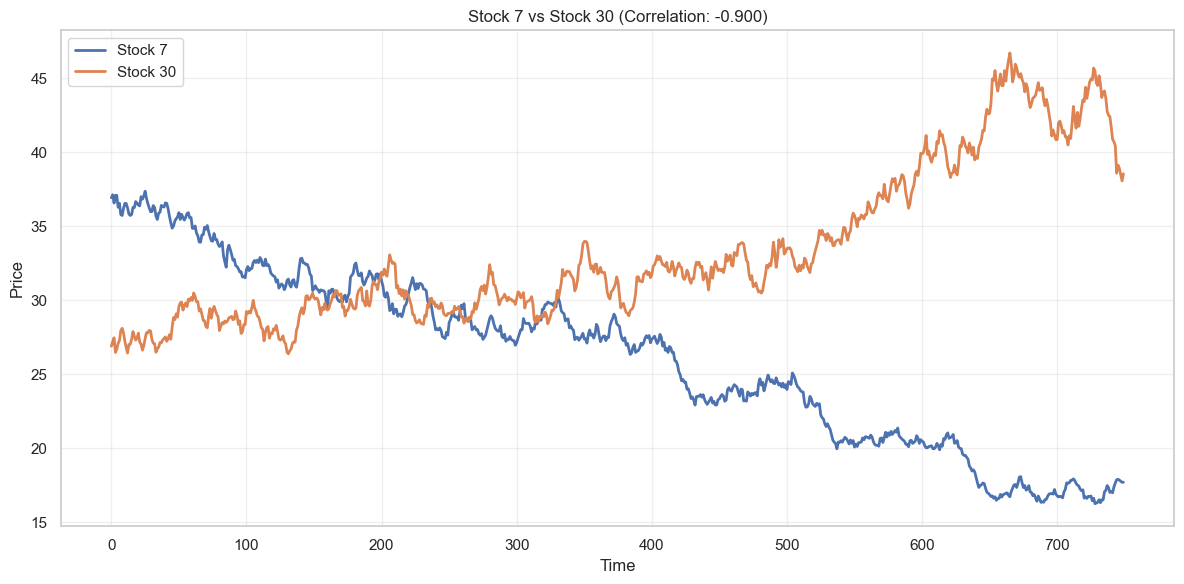

5. 7vs23: -0.893


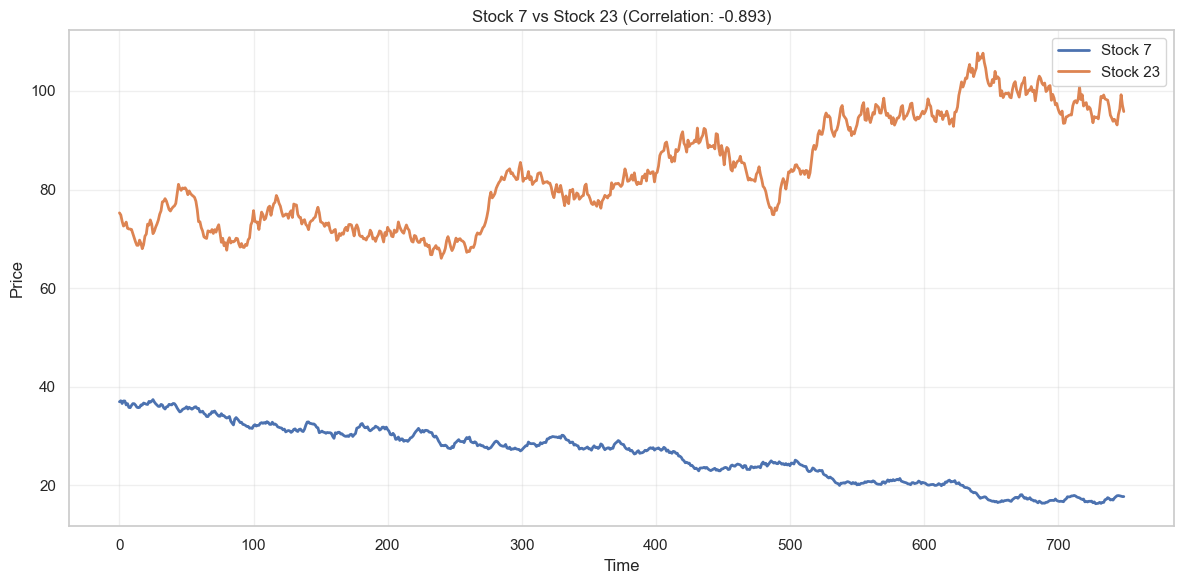

6. 17vs30: -0.885


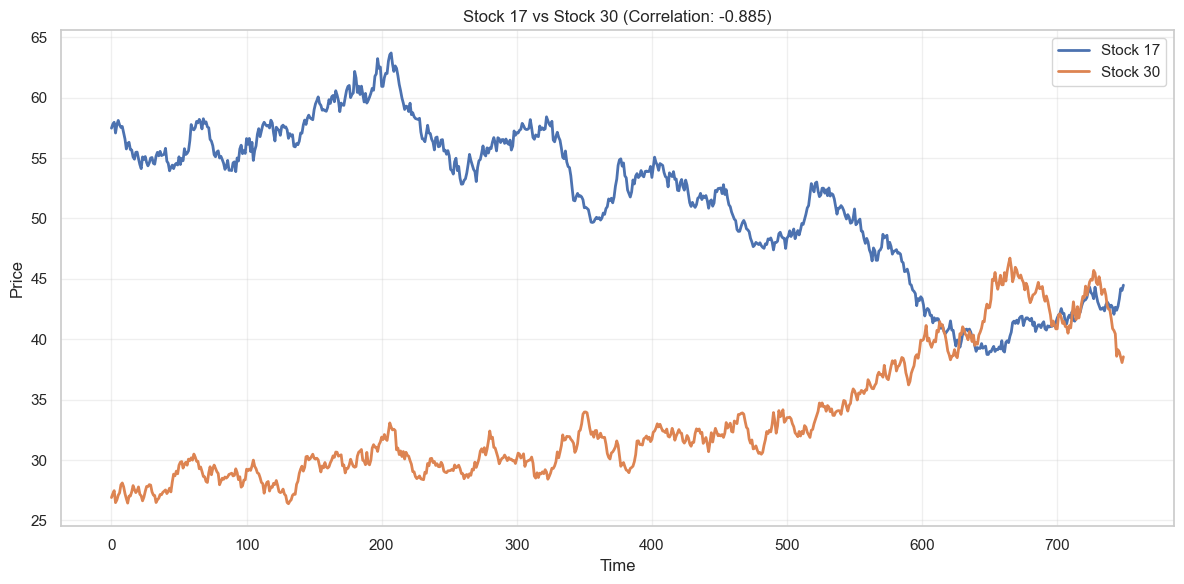

7. 3vs30: -0.880


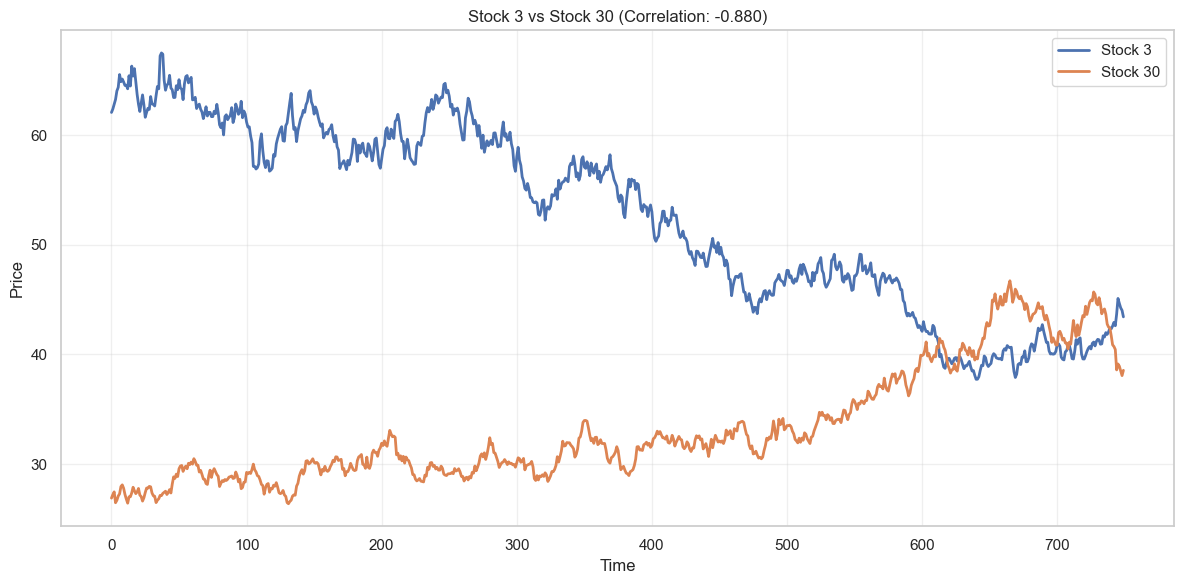

8. 5vs30: -0.874


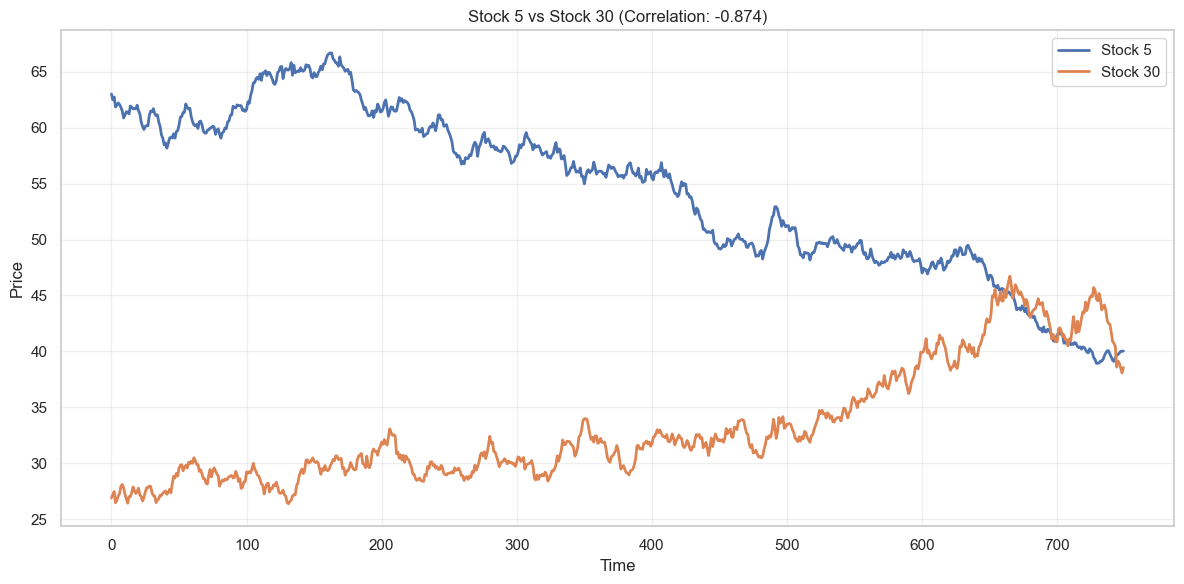

9. 5vs23: -0.867


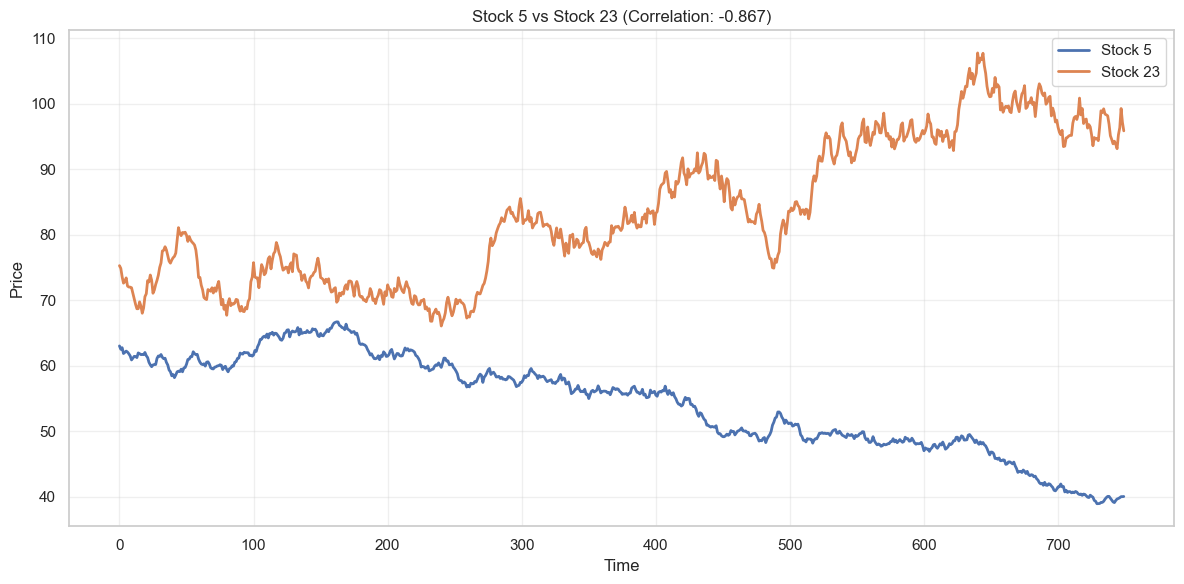

10. 34vs50: -0.866


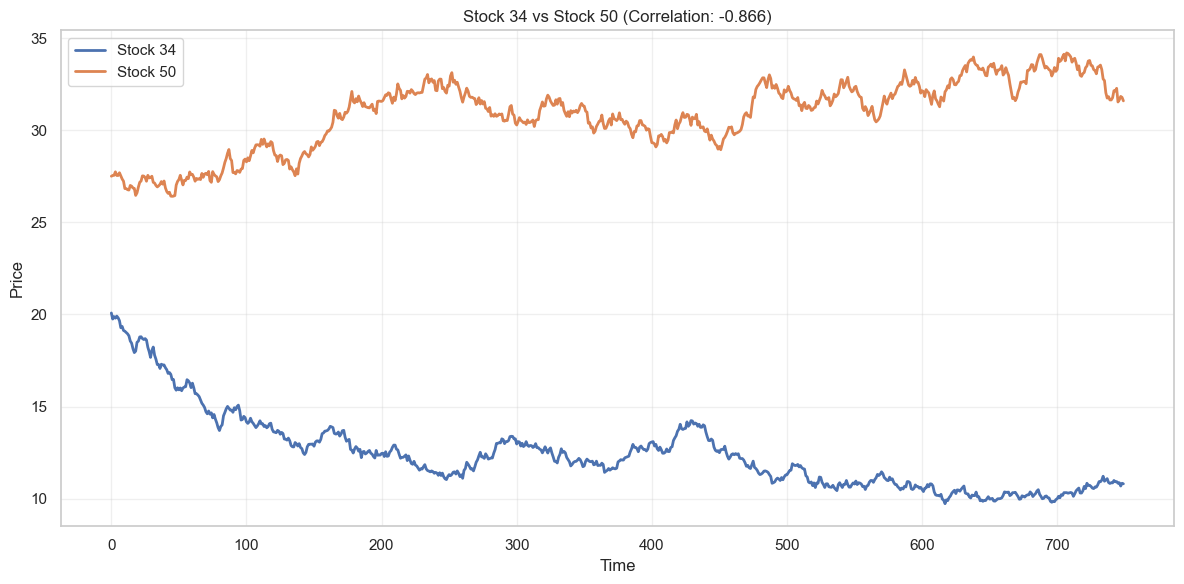

11. 17vs23: -0.861


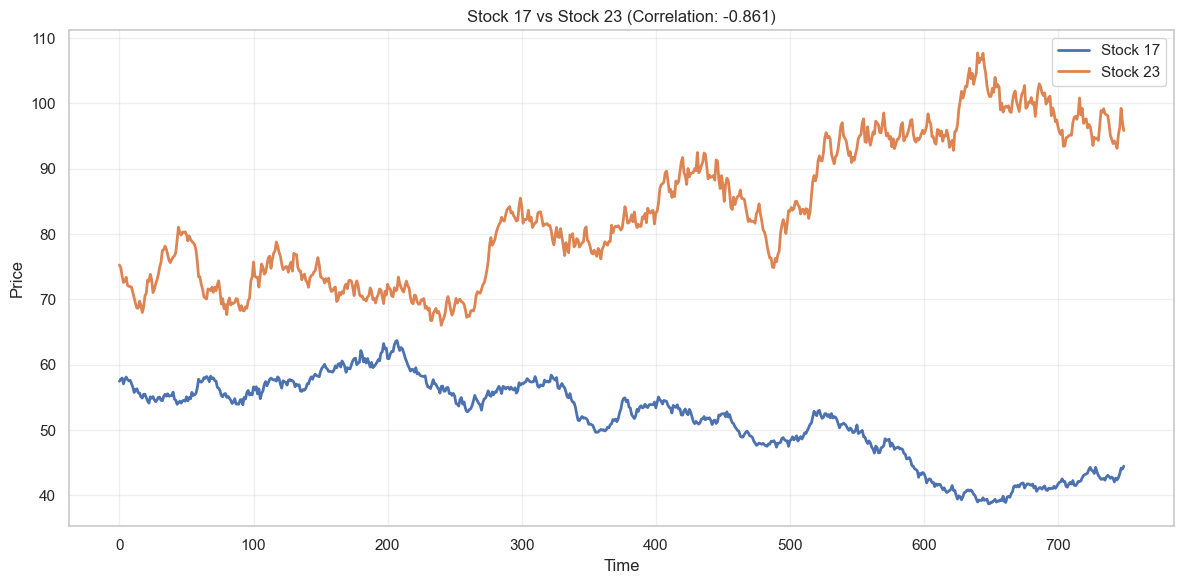

12. 13vs48: -0.861


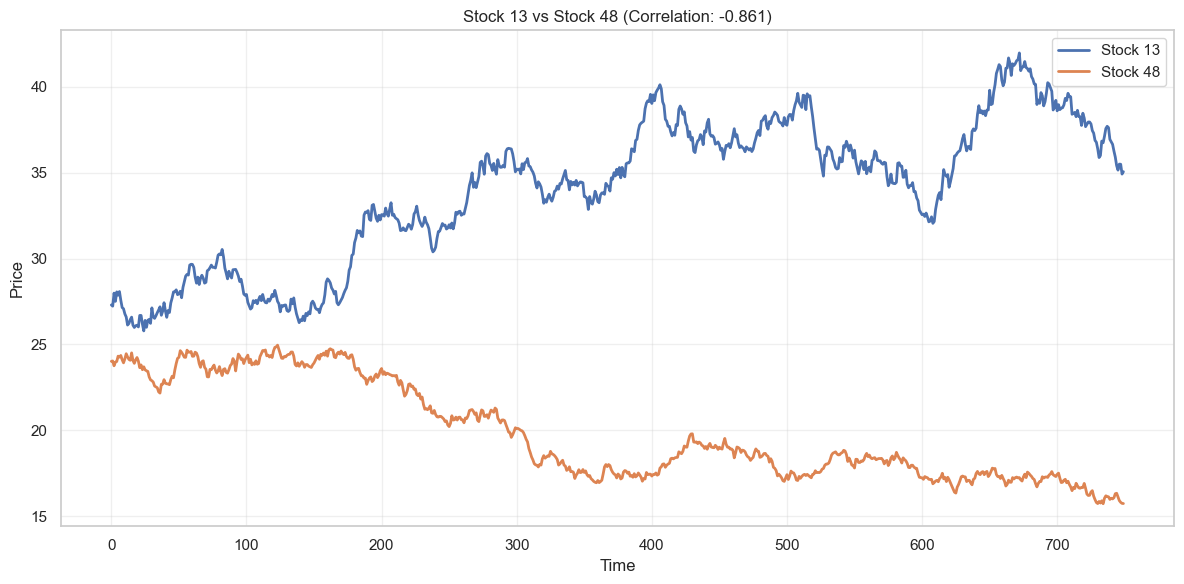

13. 26vs50: -0.840


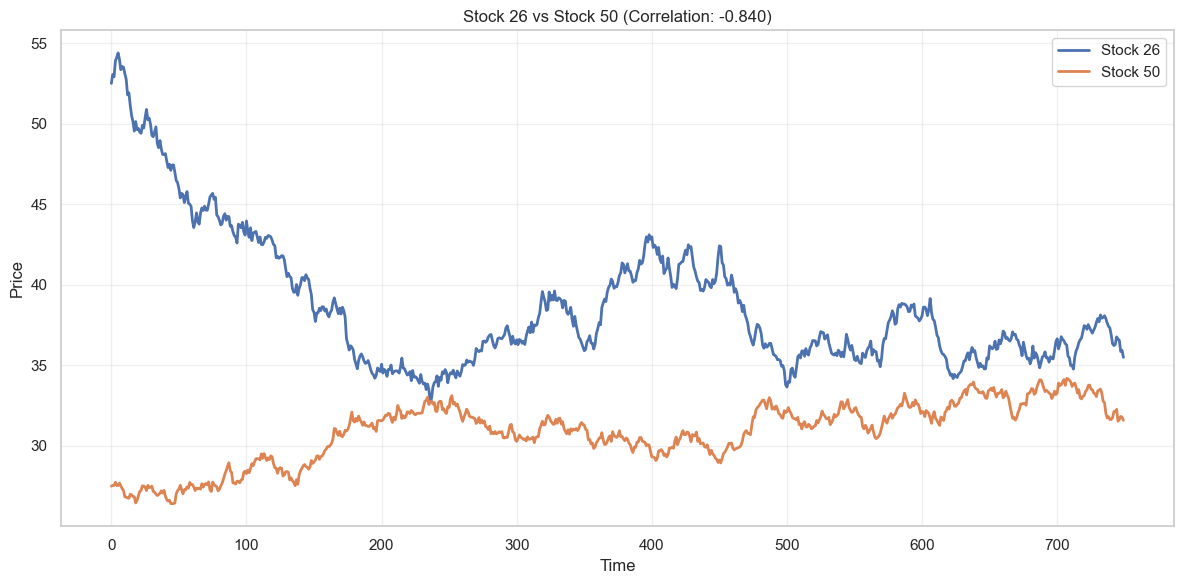

14. 21vs30: -0.819


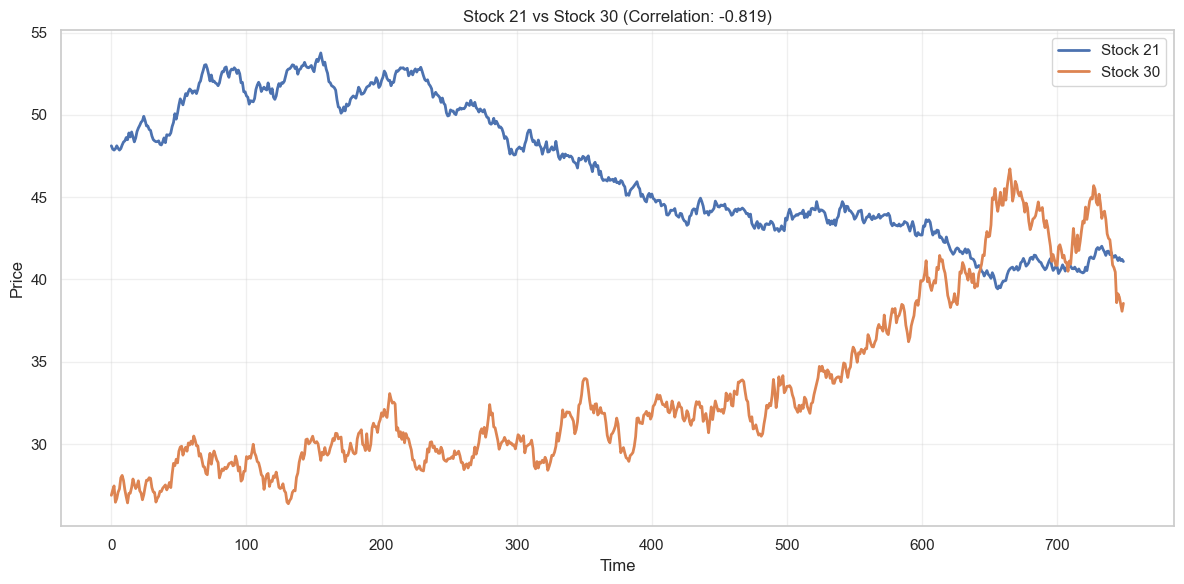

15. 7vs13: -0.818


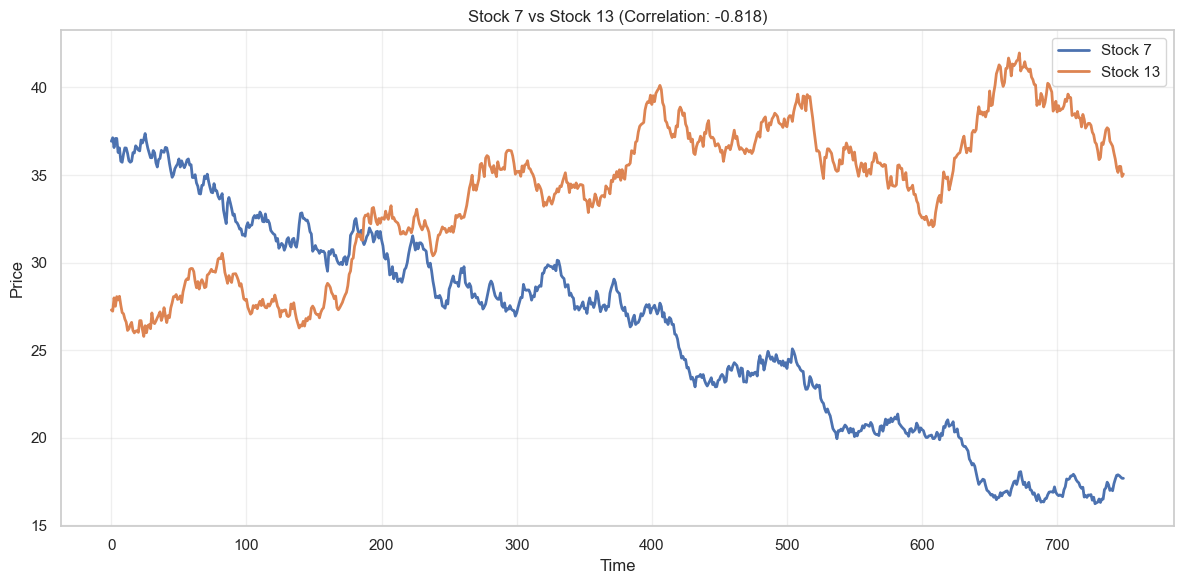

16. 13vs20: -0.817


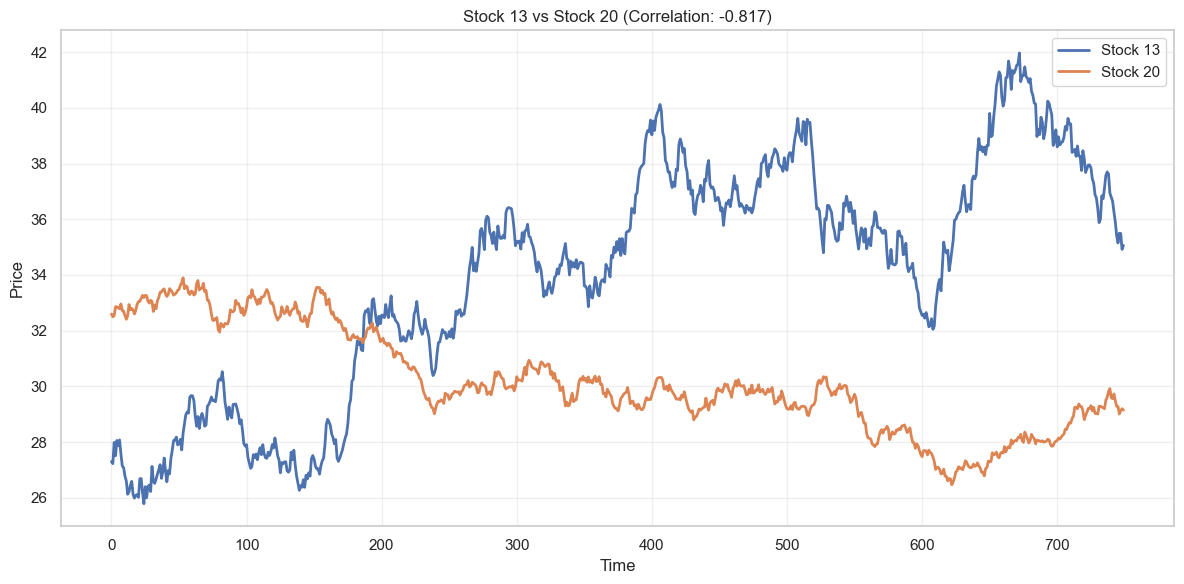

17. 7vs43: -0.810


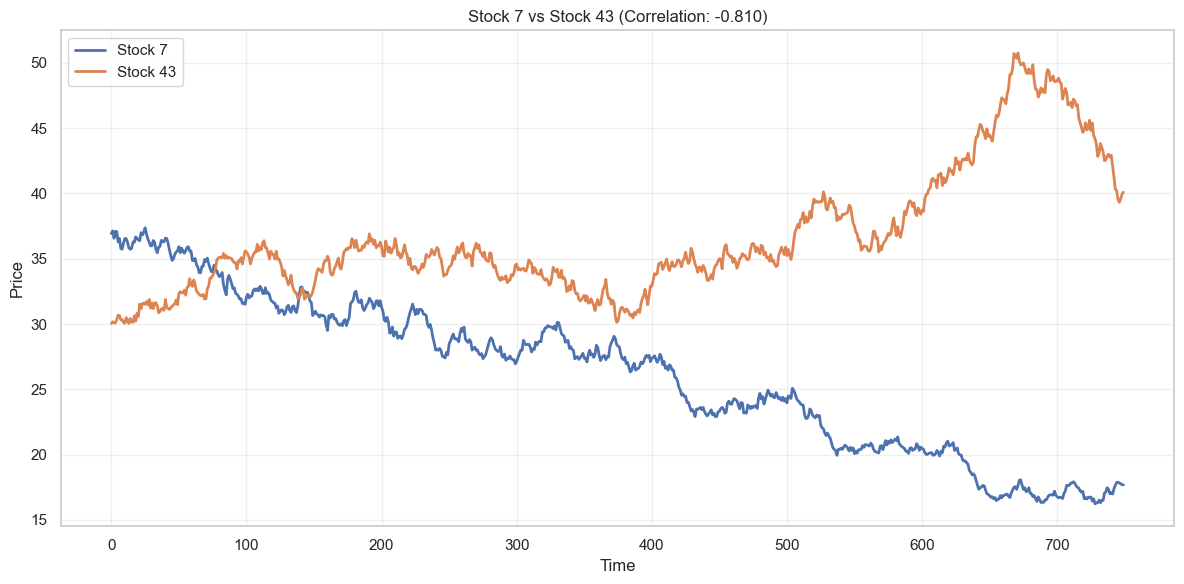

18. 13vs21: -0.808


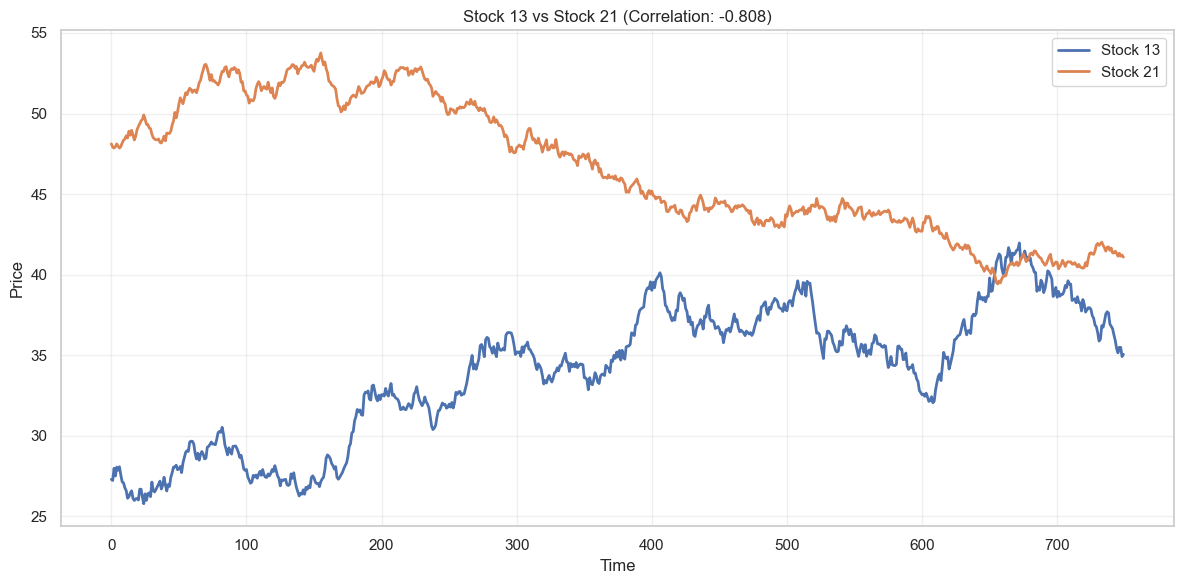

19. 7vs24: -0.808


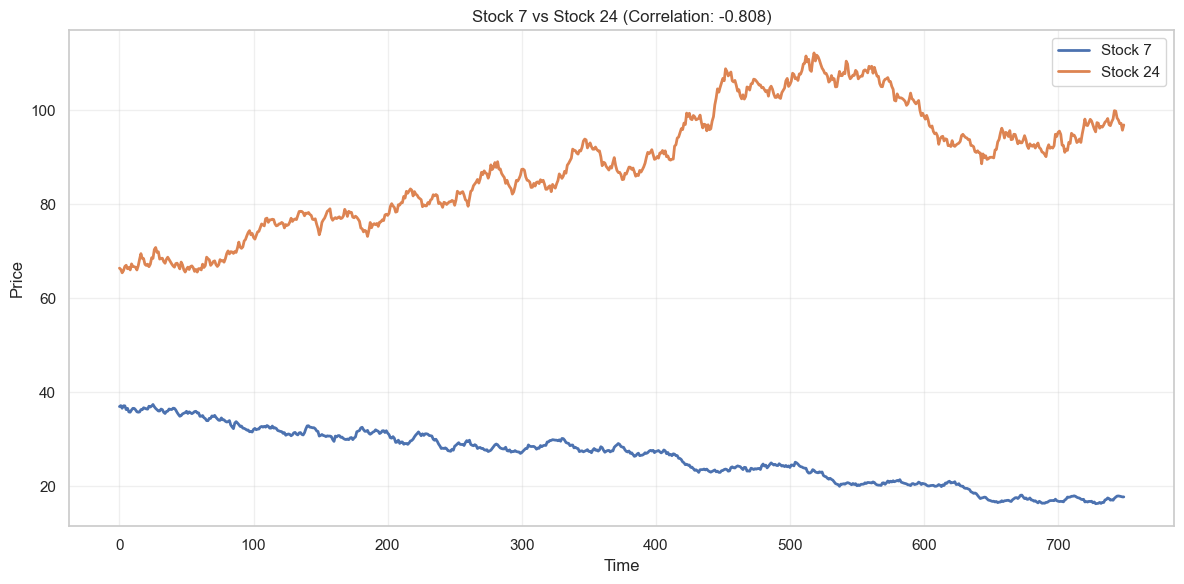

20. 23vs36: -0.801


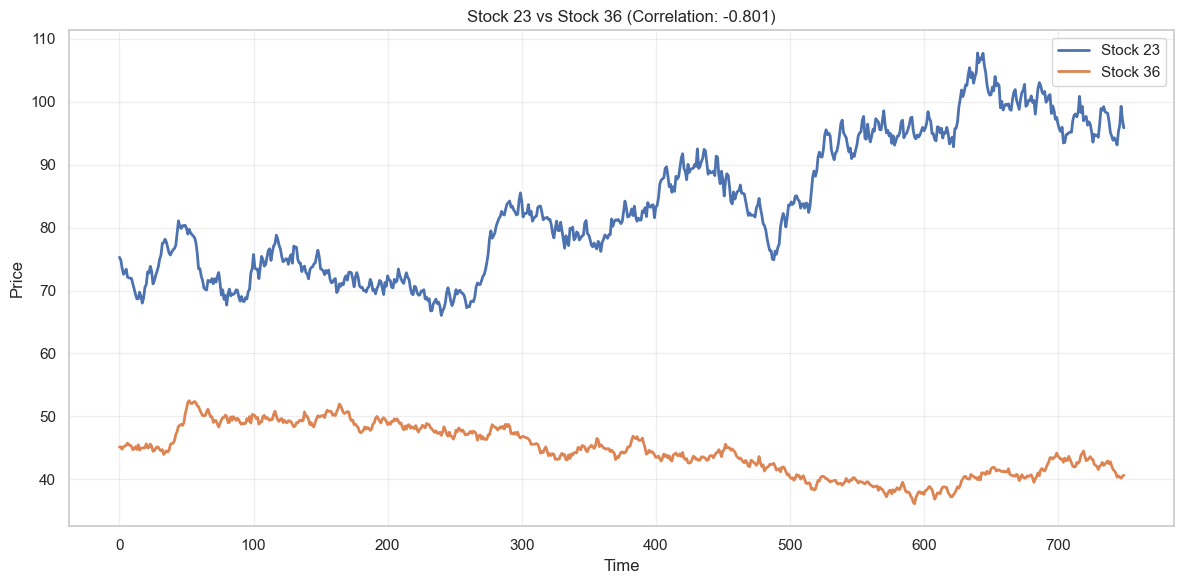

21. 24vs48: -0.801


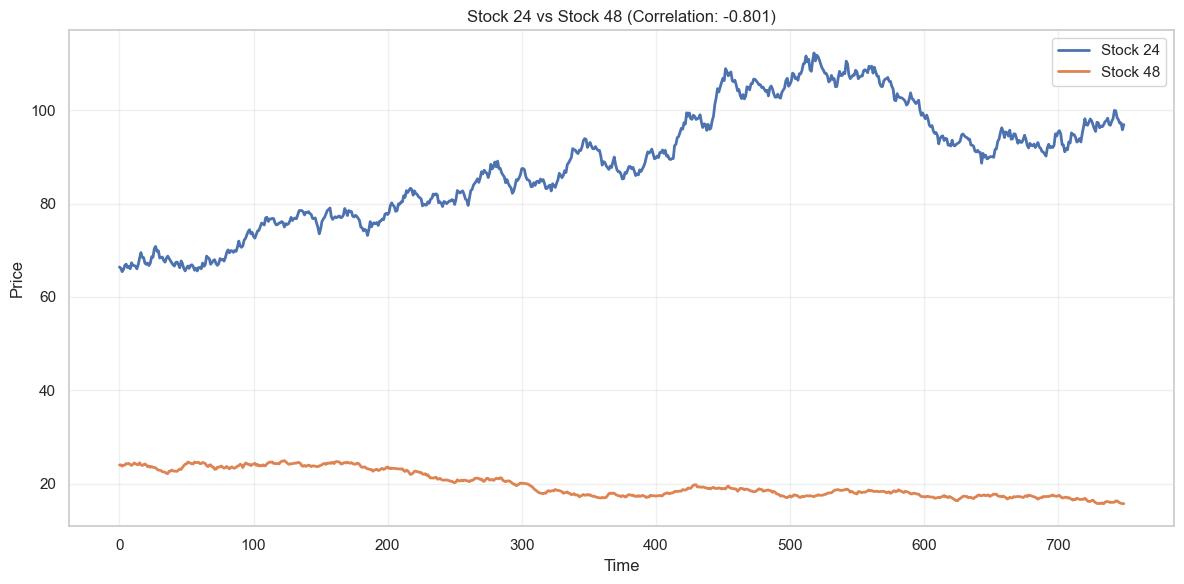

22. 12vs36: -0.799


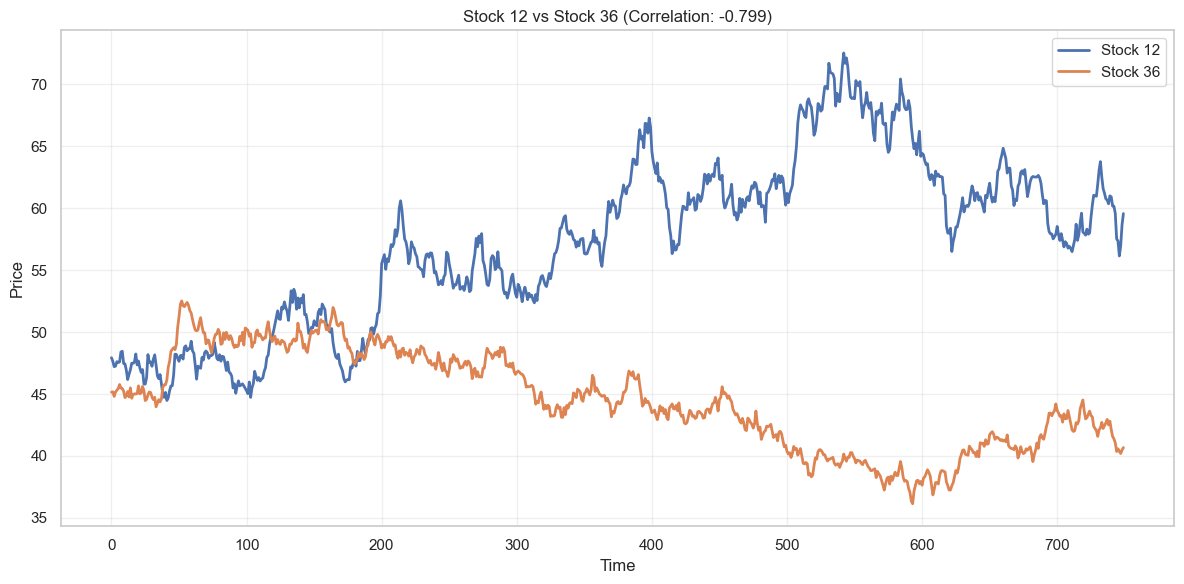

23. 20vs50: -0.794


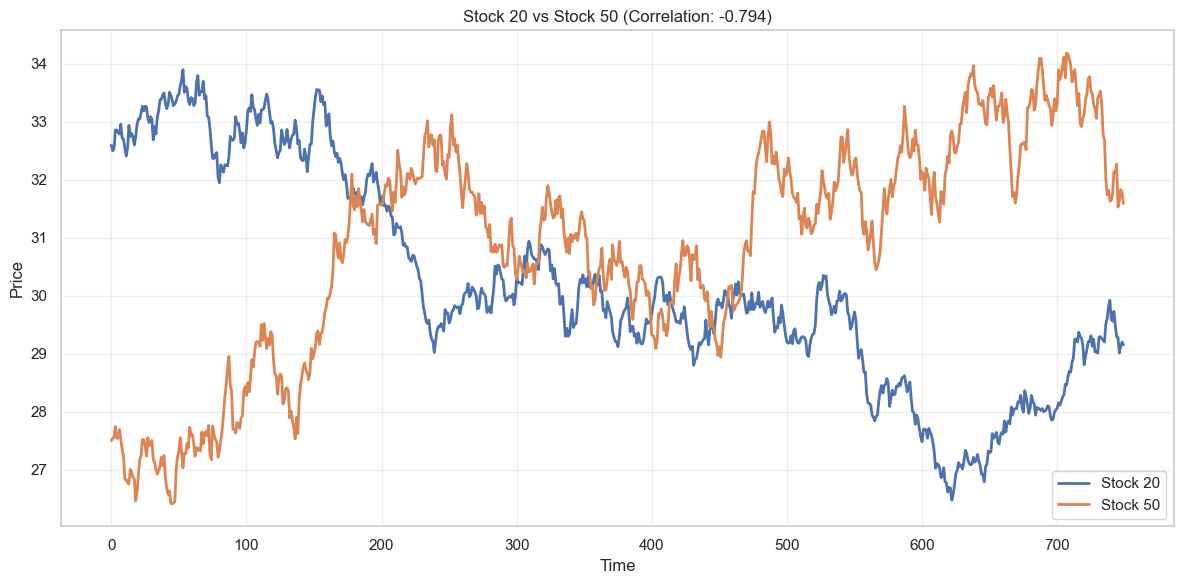

24. 24vs36: -0.794


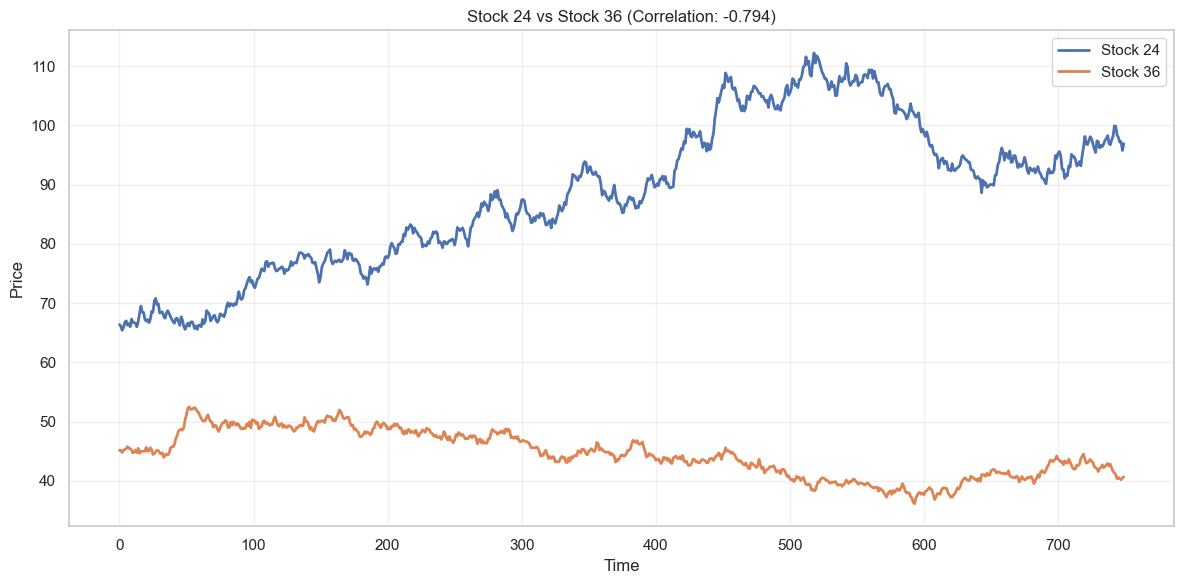

25. 12vs48: -0.794


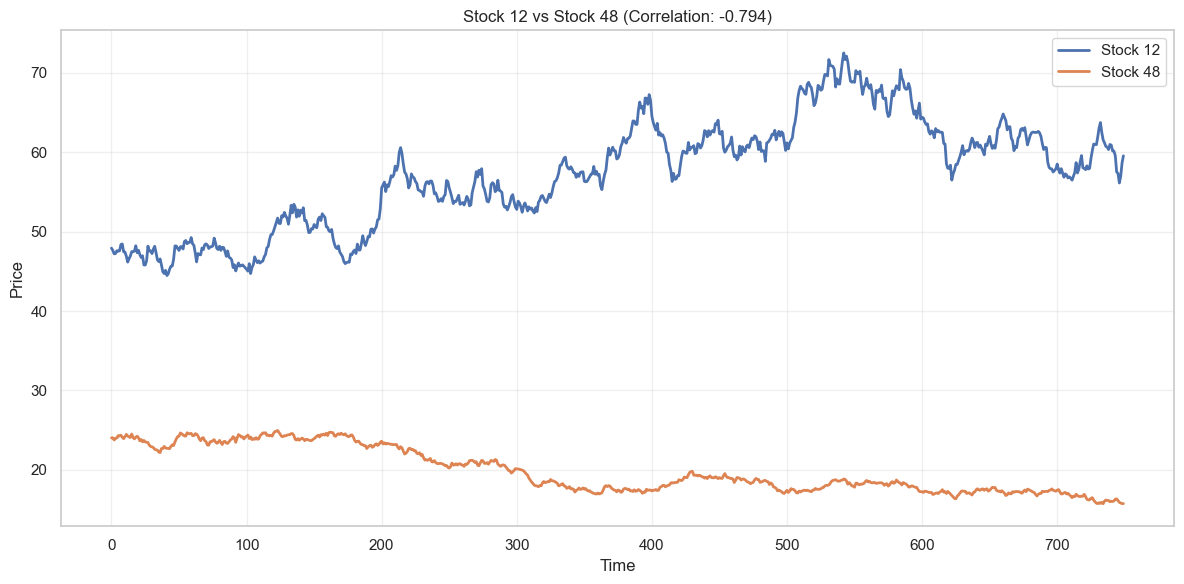

In [12]:

# lowest 25
plot_bottom_25_correlations(data, correlation_map)